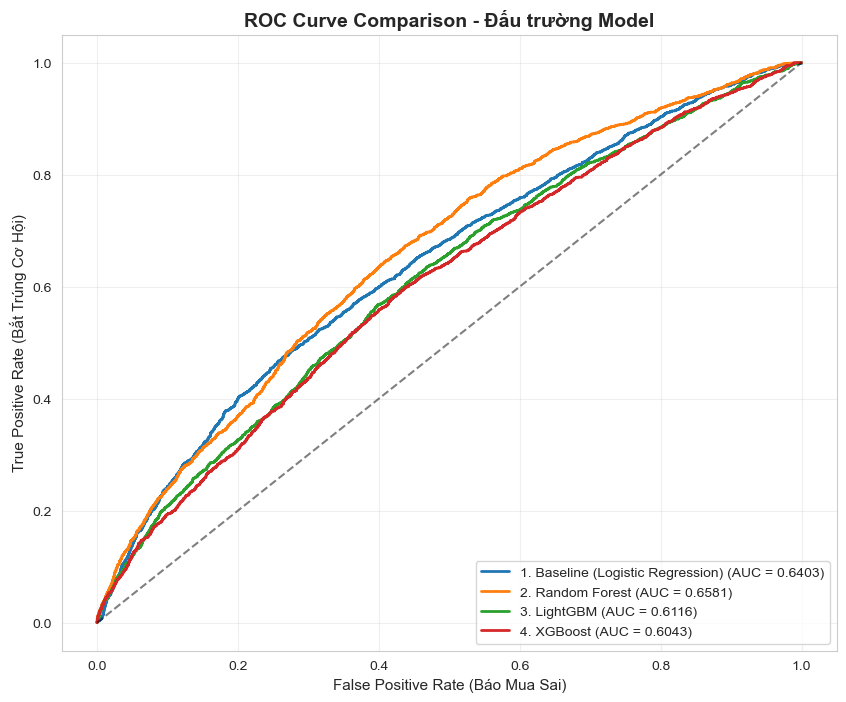

🕵️‍♀️ DEEP DIVE INTO WINNER: 2. Random Forest


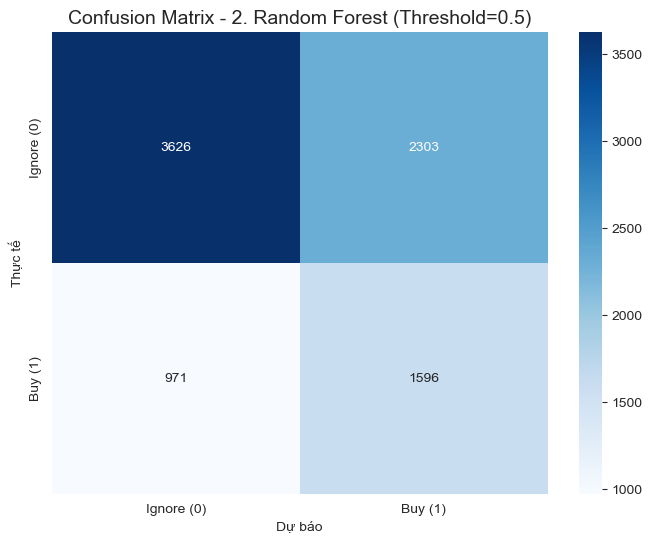


📋 SƠ BỘ HIỆU NĂNG (Ở ngưỡng mặc định 0.5):
              precision    recall  f1-score   support

      Ignore       0.79      0.61      0.69      5929
         Buy       0.41      0.62      0.49      2567

    accuracy                           0.61      8496
   macro avg       0.60      0.62      0.59      8496
weighted avg       0.67      0.61      0.63      8496


⚠️ LƯU Ý QUAN TRỌNG:
- Kết quả trên chỉ là ở ngưỡng 0.5 mặc định.
- Đừng lo nếu Precision thấp, chúng ta sẽ tối ưu Threshold ở bước tiếp theo!


In [ ]:
# ==========================================
# 1. SO SÁNH ROC CURVE (TẤT CẢ MODEL)
# ==========================================
plt.figure(figsize=(10, 8))

for name, result in model_results.items():
    model = result['model']
    # Lấy xác suất từ kết quả đã lưu
    y_scores = result['val_probs'] 
    
    # Tính FPR, TPR
    fpr, tpr, _ = roc_curve(y_val, y_scores)
    auc_score = result['val_auc']
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})', linewidth=2)

# Đường chéo tham chiếu (Random Guess)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate (Báo Mua Sai)', fontsize=11)
plt.ylabel('True Positive Rate (Bắt Trúng Cơ Hội)', fontsize=11)
plt.title('ROC Curve Comparison - Đấu trường Model', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# ==========================================
# 2. PHÂN TÍCH CHI TIẾT BEST MODEL (WINNER)
# ==========================================
print("="*60)
print(f"🕵️‍♀️ DEEP DIVE INTO WINNER: {best_model_name}")
print("="*60)

# Lấy thông tin model thắng cuộc
winner_probs = model_results[best_model_name]['val_probs']

# Dự đoán tạm thời ở ngưỡng 0.5 để xem sơ bộ
y_pred_temp = (winner_probs >= 0.5).astype(int)

# A. Confusion Matrix
cm = confusion_matrix(y_val, y_pred_temp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ignore (0)', 'Buy (1)'],
            yticklabels=['Ignore (0)', 'Buy (1)'])
plt.title(f'Confusion Matrix - {best_model_name} (Threshold=0.5)', fontsize=14)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')
plt.show()

# B. Classification Report
print("\n📋 SƠ BỘ HIỆU NĂNG (Ở ngưỡng mặc định 0.5):")
print(classification_report(y_val, y_pred_temp, target_names=['Ignore', 'Buy']))

print("\n⚠️ LƯU Ý QUAN TRỌNG:")
print("- Kết quả trên chỉ là ở ngưỡng 0.5 mặc định.")
print("- Đừng lo nếu Precision thấp, chúng ta sẽ tối ưu Threshold ở bước tiếp theo!")

## 4. Model Training - Random Forest Classifier

In [ ]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced',  # Handle class imbalance
    verbose=1
)

print("🚀 Training Random Forest model...")
print(f"   Parameters: {rf_model.get_params()}\n")

# Train model
rf_model.fit(X_train, y_train)

print("✅ Training completed!")


🚀 Training Random Forest model...
   Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 1, 'warm_start': False}



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


✅ Training completed!


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished


## 5. Model Evaluation

In [ ]:
# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate F1 scores
train_f1_macro = f1_score(y_train, y_train_pred, average='macro')
test_f1_macro = f1_score(y_test, y_test_pred, average='macro')

print("="*60)
print("📊 MODEL PERFORMANCE")
print("="*60)
print(f"\n🎯 Training Set:")
print(f"   Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"   F1-Score (Macro): {train_f1_macro:.4f}")

print(f"\n🎯 Test Set:")
print(f"   Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   F1-Score (Macro): {test_f1_macro:.4f}")
print("="*60)


📊 MODEL PERFORMANCE

🎯 Training Set:
   Accuracy: 0.8816 (88.16%)
   F1-Score (Macro): 0.8632

🎯 Test Set:
   Accuracy: 0.6039 (60.39%)
   F1-Score (Macro): 0.5581


[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
# Classification Report
print("\n📋 CLASSIFICATION REPORT - TEST SET")
print("="*60)
target_names = ['KHÔNG MUA (0)', 'MUA (1)']
print(classification_report(y_test, y_test_pred, target_names=target_names))



📋 CLASSIFICATION REPORT - TEST SET
               precision    recall  f1-score   support

KHÔNG MUA (0)       0.71      0.69      0.70      8109
      MUA (1)       0.41      0.42      0.42      4044

     accuracy                           0.60     12153
    macro avg       0.56      0.56      0.56     12153
 weighted avg       0.61      0.60      0.61     12153



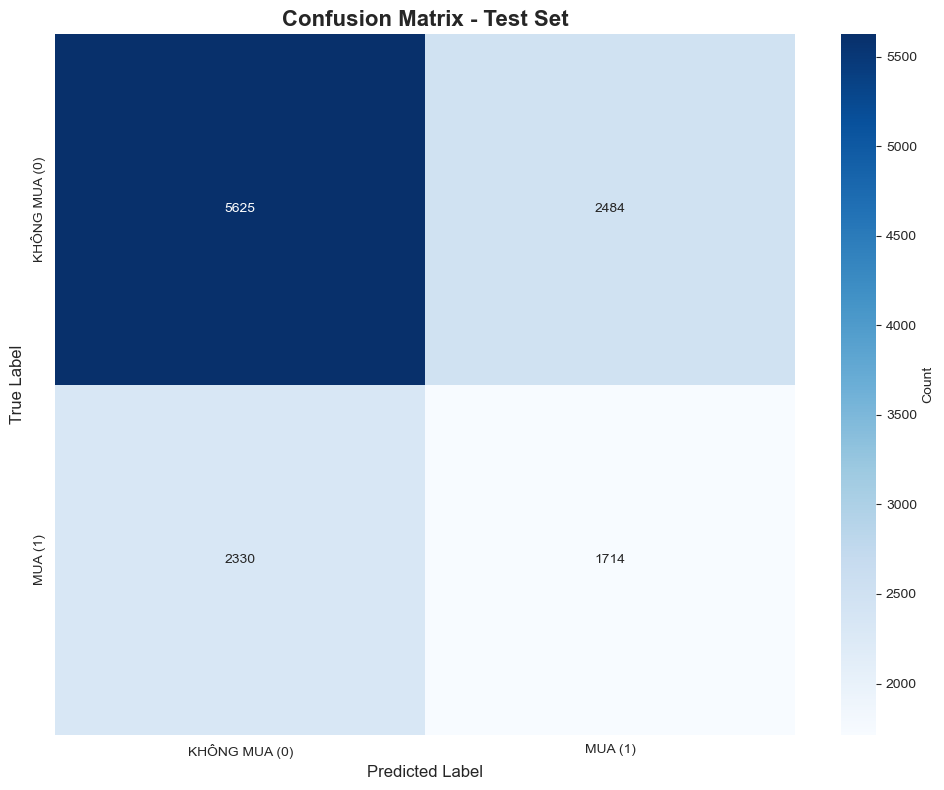


📊 Confusion Matrix (Percentages):
                   KHÔNG MUA          MUA
      KHÔNG MUA       69.37%       30.63%
            MUA       57.62%       42.38%


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['KHÔNG MUA (0)', 'MUA (1)'],
            yticklabels=['KHÔNG MUA (0)', 'MUA (1)'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Test Set', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Calculate percentages
cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
print("\n📊 Confusion Matrix (Percentages):")
print(f"{'':>15} {'KHÔNG MUA':>12} {'MUA':>12}")
labels = ['KHÔNG MUA', 'MUA']
for i, label in enumerate(labels):
    print(f"{label:>15} {cm_pct[i,0]:>11.2f}% {cm_pct[i,1]:>11.2f}%")


[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.0s finished


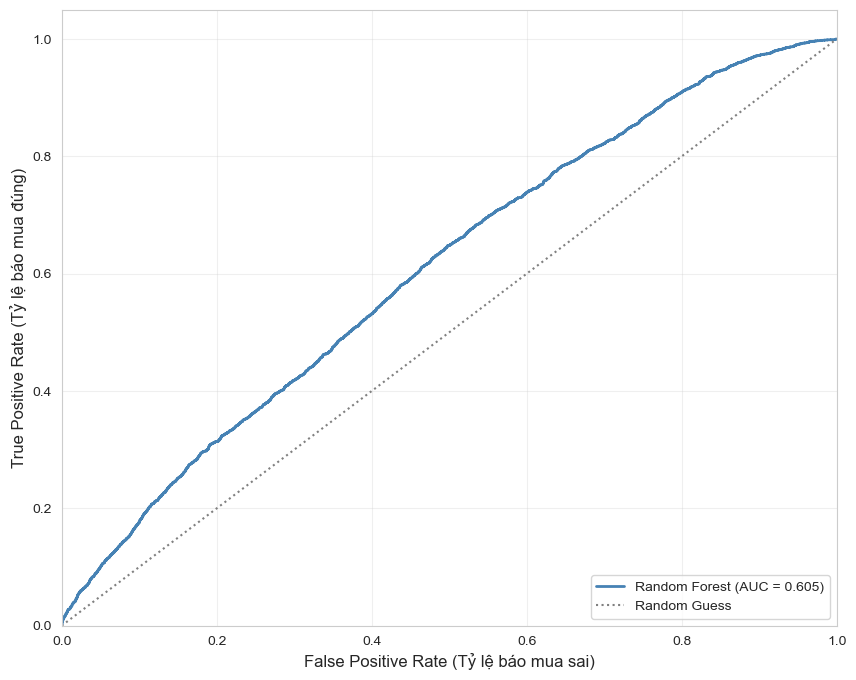

In [ ]:
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', color='steelblue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle=':', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Tỷ lệ báo mua sai)', fontsize=12)
plt.ylabel('True Positive Rate (Tỷ lệ báo mua đúng)', fontsize=12)
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

## 6. Feature Importance Analysis

In [ ]:
# Get feature importances
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Top 20 features
top_20_features = feature_importance.head(20)

print("🔝 TOP 20 MOST IMPORTANT FEATURES:")
print("="*60)
for idx, row in top_20_features.iterrows():
    print(f"{row['feature']:30s} {row['importance']:.4f}")
print("="*60)


🔝 TOP 20 MOST IMPORTANT FEATURES:
volatility_20                  0.0740
volume_ma_20                   0.0611
obv                            0.0600
bb_width                       0.0581
atr_14                         0.0454
ma_20_divergence               0.0439
ma_50_divergence               0.0435
macd                           0.0427
adx                            0.0427
macd_histogram                 0.0405
ma_5_divergence                0.0400
close                          0.0399
high                           0.0396
low                            0.0377
minus_di                       0.0376
open                           0.0376
volume                         0.0370
plus_di                        0.0363
stochastic_k                   0.0318
bb_position                    0.0288


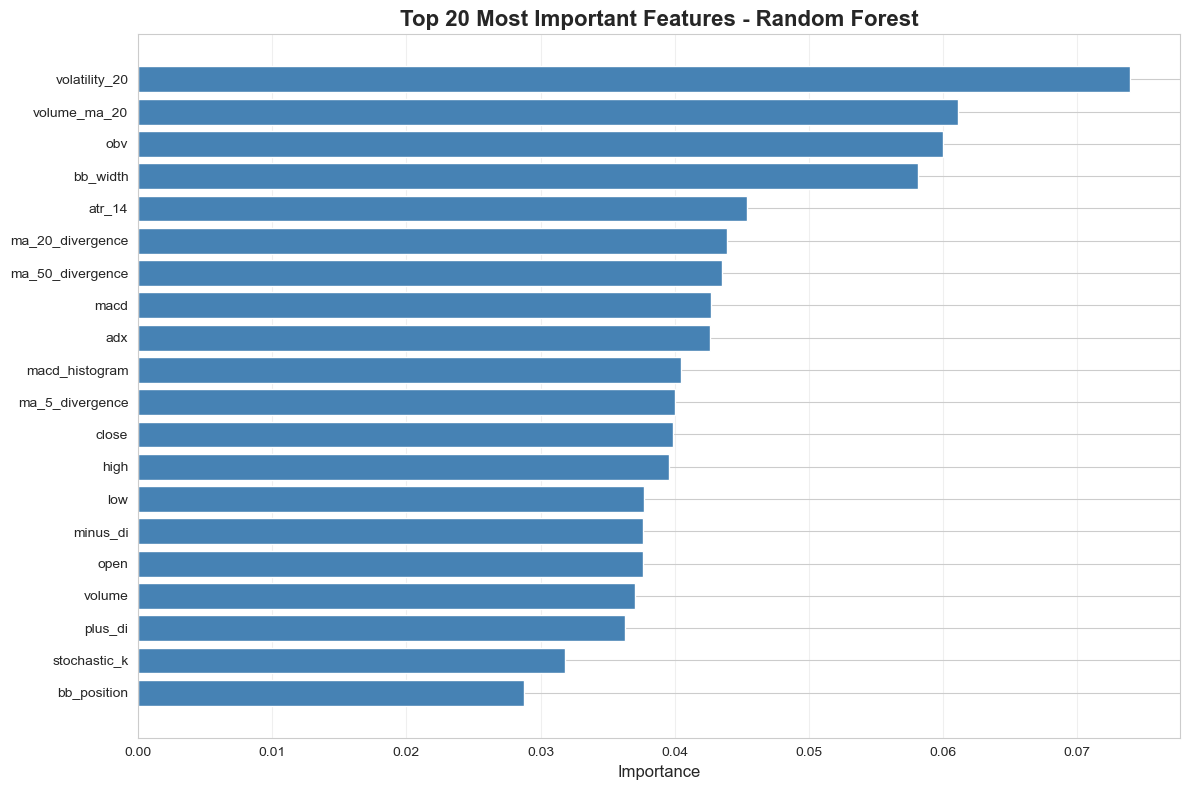

In [ ]:
# Visualize Feature Importance - Random Forest
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_20_features)), top_20_features['importance'], color='steelblue')
plt.yticks(range(len(top_20_features)), top_20_features['feature'])
plt.xlabel('Importance', fontsize=12)
plt.title('Top 20 Most Important Features - Random Forest', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


---

## 7. Baseline Model - Logistic Regression

Model đơn giản để làm baseline so sánh với Random Forest và LightGBM

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Logistic Regression requires feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression
lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

print("🚀 Training Logistic Regression (Baseline) model...")
print(f"   Parameters: max_iter={lr_model.max_iter}, class_weight={lr_model.class_weight}\n")

# Train model
lr_model.fit(X_train_scaled, y_train)

print("✅ Baseline training completed!")


🚀 Training Logistic Regression (Baseline) model...
   Parameters: max_iter=1000, class_weight=balanced

✅ Baseline training completed!


In [ ]:
# Make predictions with Logistic Regression
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Calculate metrics
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)

train_f1_macro_lr = f1_score(y_train, y_train_pred_lr, average='macro')
test_f1_macro_lr = f1_score(y_test, y_test_pred_lr, average='macro')

print("="*60)
print("📊 LOGISTIC REGRESSION (BASELINE) PERFORMANCE")
print("="*60)
print(f"\n🎯 Training Set:")
print(f"   Accuracy: {train_accuracy_lr:.4f} ({train_accuracy_lr*100:.2f}%)")
print(f"   F1-Score (Macro): {train_f1_macro_lr:.4f}")

print(f"\n🎯 Test Set:")
print(f"   Accuracy: {test_accuracy_lr:.4f} ({test_accuracy_lr*100:.2f}%)")
print(f"   F1-Score (Macro): {test_f1_macro_lr:.4f}")
print("="*60)


📊 LOGISTIC REGRESSION (BASELINE) PERFORMANCE

🎯 Training Set:
   Accuracy: 0.6025 (60.25%)
   F1-Score (Macro): 0.5635

🎯 Test Set:
   Accuracy: 0.5835 (58.35%)
   F1-Score (Macro): 0.5668


In [ ]:
# Classification Report for Logistic Regression
print("\n📋 CLASSIFICATION REPORT - BASELINE TEST SET")
print("="*60)
target_names = ['KHÔNG MUA (0)', 'MUA (1)']
print(classification_report(y_test, y_test_pred_lr, target_names=target_names))



📋 CLASSIFICATION REPORT - BASELINE TEST SET
               precision    recall  f1-score   support

KHÔNG MUA (0)       0.74      0.58      0.65      8109
      MUA (1)       0.41      0.58      0.48      4044

     accuracy                           0.58     12153
    macro avg       0.57      0.58      0.57     12153
 weighted avg       0.63      0.58      0.60     12153



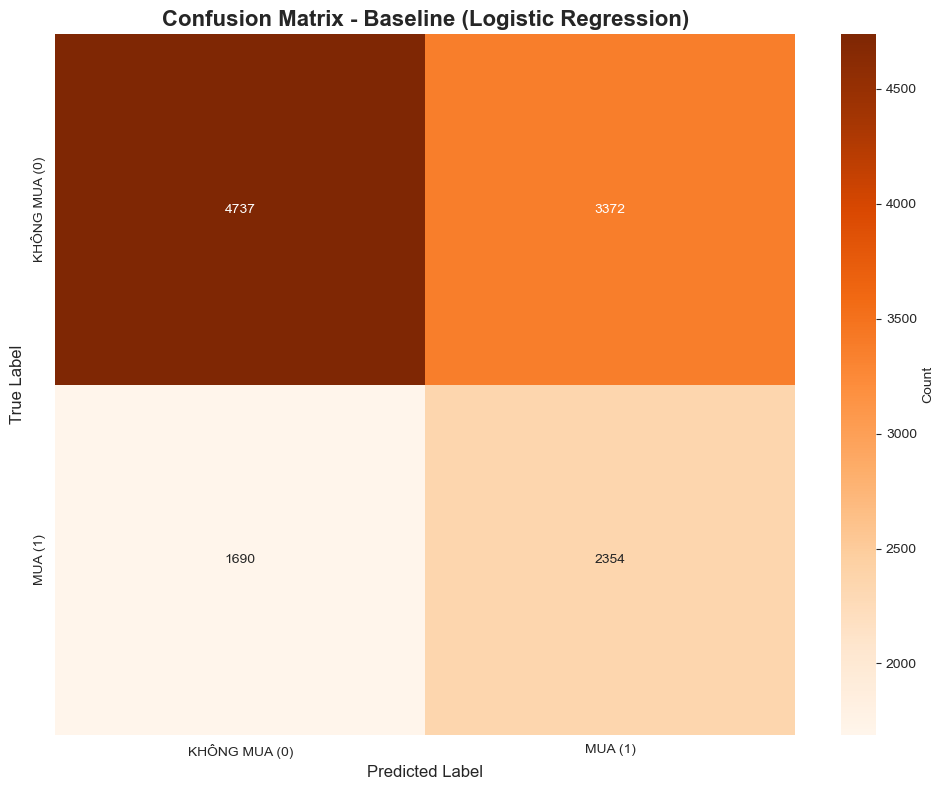


📊 Confusion Matrix (Percentages):
                   KHÔNG MUA          MUA
      KHÔNG MUA       58.42%       41.58%
            MUA       41.79%       58.21%


In [ ]:
# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_test_pred_lr)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['KHÔNG MUA (0)', 'MUA (1)'],
            yticklabels=['KHÔNG MUA (0)', 'MUA (1)'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Baseline (Logistic Regression)', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Calculate percentages
cm_lr_pct = cm_lr.astype('float') / cm_lr.sum(axis=1)[:, np.newaxis] * 100
print("\n📊 Confusion Matrix (Percentages):")
print(f"{'':>15} {'KHÔNG MUA':>12} {'MUA':>12}")
labels = ['KHÔNG MUA', 'MUA']
for i, label in enumerate(labels):
    print(f"{label:>15} {cm_lr_pct[i,0]:>11.2f}% {cm_lr_pct[i,1]:>11.2f}%")


## 7. Prediction Examples - Per Stock Analysis

In [ ]:
# Add predictions to test dataframe
test_df_with_pred = test_df.copy()
test_df_with_pred['Predicted'] = y_test_pred
test_df_with_pred['Correct'] = (test_df_with_pred['Target'] == test_df_with_pred['Predicted'])

# Sample predictions for first 3 stocks
sample_stocks = test_df_with_pred['symbol'].unique()[:3]

print("📊 SAMPLE PREDICTIONS FOR FIRST 3 STOCKS")
print("="*80)

for stock in sample_stocks:
    stock_data = test_df_with_pred[test_df_with_pred['symbol'] == stock].tail(10)
    
    print(f"\n🏢 Stock: {stock}")
    print(f"   Accuracy: {stock_data['Correct'].mean()*100:.2f}%")
    print(f"   {'Date':<12} {'Actual':<10} {'Predicted':<10} {'Correct'}")
    print("   " + "-"*50)
    
    for _, row in stock_data.iterrows():
        action_map = {-1: 'SELL', 0: 'HOLD', 1: 'BUY'}
        actual = action_map[row['Target']]
        pred = action_map[row['Predicted']]
        correct = '✅' if row['Correct'] else '❌'
        print(f"   {row['time'].strftime('%Y-%m-%d'):<12} {actual:<10} {pred:<10} {correct}")

print("="*80)


📊 SAMPLE PREDICTIONS FOR FIRST 3 STOCKS

🏢 Stock: AAM
   Accuracy: 100.00%
   Date         Actual     Predicted  Correct
   --------------------------------------------------
   2025-10-09   HOLD       HOLD       ✅
   2025-10-10   HOLD       HOLD       ✅
   2025-10-13   HOLD       HOLD       ✅
   2025-10-14   HOLD       HOLD       ✅
   2025-10-15   HOLD       HOLD       ✅
   2025-10-16   HOLD       HOLD       ✅
   2025-10-17   HOLD       HOLD       ✅
   2025-10-20   HOLD       HOLD       ✅
   2025-10-21   HOLD       HOLD       ✅
   2025-10-22   HOLD       HOLD       ✅

🏢 Stock: ACV
   Accuracy: 60.00%
   Date         Actual     Predicted  Correct
   --------------------------------------------------
   2025-10-09   HOLD       HOLD       ✅
   2025-10-10   HOLD       HOLD       ✅
   2025-10-13   HOLD       HOLD       ✅
   2025-10-14   HOLD       HOLD       ✅
   2025-10-15   HOLD       BUY        ❌
   2025-10-16   HOLD       BUY        ❌
   2025-10-17   BUY        BUY        ✅
   2025-10-

## 8. Model Summary & Insights

In [ ]:
print("="*80)
print("📊 FINAL MODEL SUMMARY")
print("="*80)
print(f"\n🤖 Model: Random Forest Classifier")
print(f"   - Number of trees: {rf_model.n_estimators}")
print(f"   - Max depth: {rf_model.max_depth}")
print(f"   - Class weight: {rf_model.class_weight}")

print(f"\n📈 Dataset:")
print(f"   - Training samples: {len(X_train):,}")
print(f"   - Test samples: {len(X_test):,}")
print(f"   - Number of features: {len(feature_cols)}")
print(f"   - Number of stocks: {df_clean['symbol'].nunique()}")

print(f"\n🎯 Performance:")
print(f"   - Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   - Test F1-Score (Macro): {test_f1_macro:.4f}")

print(f"\n🔝 Top 5 Most Important Features:")
for i, row in feature_importance.head(5).iterrows():
    print(f"   {i+1}. {row['feature']}: {row['importance']:.4f}")

print(f"\n💡 Insights:")
print(f"   - Model sử dụng time-series split (80/20)")
print(f"   - Không shuffle để giữ tính time series")
print(f"   - Class weight balanced để xử lý imbalanced data")
print(f"   - Prediction được thực hiện cho 20% dữ liệu cuối của mỗi mã")

print("="*80)


📊 FINAL MODEL SUMMARY

🤖 Model: Random Forest Classifier
   - Number of trees: 100
   - Max depth: 15
   - Class weight: balanced

📈 Dataset:
   - Training samples: 53,469
   - Test samples: 12,153
   - Number of features: 30
   - Number of stocks: 100

🎯 Performance:
   - Test Accuracy: 0.6039 (60.39%)
   - Test F1-Score (Macro): 0.5581

🔝 Top 5 Most Important Features:
   16. volatility_20: 0.0740
   20. volume_ma_20: 0.0611
   22. obv: 0.0600
   18. bb_width: 0.0581
   17. atr_14: 0.0454

💡 Insights:
   - Model sử dụng time-series split (80/20)
   - Không shuffle để giữ tính time series
   - Class weight balanced để xử lý imbalanced data
   - Prediction được thực hiện cho 20% dữ liệu cuối của mỗi mã


---

## 9. LightGBM Model - Comparison

LightGBM thường cho hiệu suất tốt hơn với time series và large datasets

In [ ]:
# Initialize LightGBM Classifier
lgbm_model = lgb.LGBMClassifier(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.05,
    num_leaves=31,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced',
    verbose=-1
)

print("🚀 Training LightGBM model...")
print(f"   Parameters:")
print(f"   - n_estimators: {lgbm_model.n_estimators}")
print(f"   - max_depth: {lgbm_model.max_depth}")
print(f"   - learning_rate: {lgbm_model.learning_rate}")
print(f"   - num_leaves: {lgbm_model.num_leaves}\n")

# Train model
lgbm_model.fit(X_train, y_train)

print("✅ LightGBM training completed!")


🚀 Training LightGBM model...
   Parameters:
   - n_estimators: 200
   - max_depth: 10
   - learning_rate: 0.05
   - num_leaves: 31

✅ LightGBM training completed!


In [ ]:
# Get LightGBM feature importances
feature_importance_lgbm = pd.DataFrame({
    'feature': feature_cols,
    'importance': lgbm_model.feature_importances_
}).sort_values('importance', ascending=False)

# Top 20 features
top_20_features_lgbm = feature_importance_lgbm.head(20)

print("🔝 TOP 20 MOST IMPORTANT FEATURES - LIGHTGBM:")
print("="*60)
for idx, row in top_20_features_lgbm.iterrows():
    print(f"{row['feature']:30s} {row['importance']:.4f}")
print("="*60)


🔝 TOP 20 MOST IMPORTANT FEATURES - LIGHTGBM:
obv                            594.0000
volume_ma_20                   532.0000
volatility_20                  484.0000
atr_14                         366.0000
adx                            362.0000
macd                           335.0000
ma_50_divergence               321.0000
bb_width                       287.0000
macd_histogram                 261.0000
minus_di                       250.0000
close                          247.0000
plus_di                        240.0000
open                           205.0000
low                            188.0000
high                           182.0000
stochastic_k                   181.0000
volume                         154.0000
ma_20_divergence               151.0000
rsi_14                         138.0000
ma_5_divergence                135.0000


In [ ]:
# Make predictions with LightGBM
y_train_pred_lgbm = lgbm_model.predict(X_train)
y_test_pred_lgbm = lgbm_model.predict(X_test)

# Calculate metrics
train_accuracy_lgbm = accuracy_score(y_train, y_train_pred_lgbm)
test_accuracy_lgbm = accuracy_score(y_test, y_test_pred_lgbm)

train_f1_macro_lgbm = f1_score(y_train, y_train_pred_lgbm, average='macro')
test_f1_macro_lgbm = f1_score(y_test, y_test_pred_lgbm, average='macro')

print("="*60)
print("📊 LIGHTGBM MODEL PERFORMANCE")
print("="*60)
print(f"\n🎯 Training Set:")
print(f"   Accuracy: {train_accuracy_lgbm:.4f} ({train_accuracy_lgbm*100:.2f}%)")
print(f"   F1-Score (Macro): {train_f1_macro_lgbm:.4f}")

print(f"\n🎯 Test Set:")
print(f"   Accuracy: {test_accuracy_lgbm:.4f} ({test_accuracy_lgbm*100:.2f}%)")
print(f"   F1-Score (Macro): {test_f1_macro_lgbm:.4f}")
print("="*60)


📊 LIGHTGBM MODEL PERFORMANCE

🎯 Training Set:
   Accuracy: 0.7244 (72.44%)
   F1-Score (Macro): 0.7019

🎯 Test Set:
   Accuracy: 0.5675 (56.75%)
   F1-Score (Macro): 0.5428


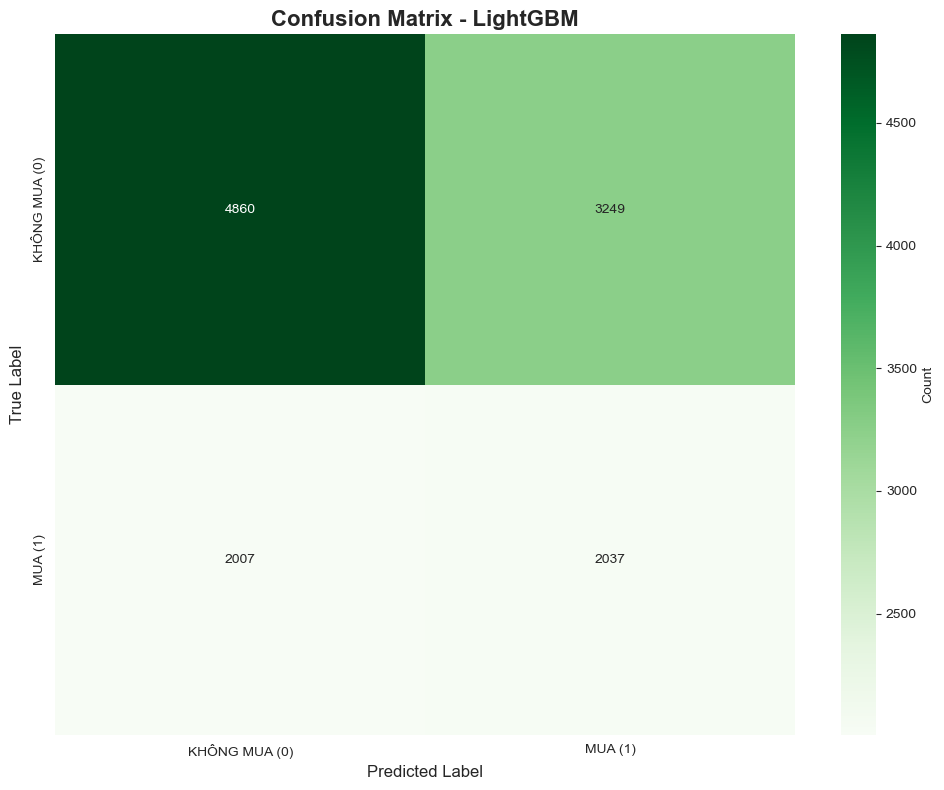


📊 Confusion Matrix (Percentages):
                   KHÔNG MUA          MUA
      KHÔNG MUA       59.93%       40.07%
            MUA       49.63%       50.37%


In [ ]:
# Confusion Matrix for LightGBM
cm_lgbm = confusion_matrix(y_test, y_test_pred_lgbm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['KHÔNG MUA (0)', 'MUA (1)'],
            yticklabels=['KHÔNG MUA (0)', 'MUA (1)'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - LightGBM', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Calculate percentages
cm_lgbm_pct = cm_lgbm.astype('float') / cm_lgbm.sum(axis=1)[:, np.newaxis] * 100
print("\n📊 Confusion Matrix (Percentages):")
print(f"{'':>15} {'KHÔNG MUA':>12} {'MUA':>12}")
labels = ['KHÔNG MUA', 'MUA']
for i, label in enumerate(labels):
    print(f"{label:>15} {cm_lgbm_pct[i,0]:>11.2f}% {cm_lgbm_pct[i,1]:>11.2f}%")


In [ ]:
# Classification Report for LightGBM
print("\n📋 CLASSIFICATION REPORT - LIGHTGBM TEST SET")
print("="*60)
target_names = ['KHÔNG MUA (0)', 'MUA (1)']
print(classification_report(y_test, y_test_pred_lgbm, target_names=target_names))



📋 CLASSIFICATION REPORT - LIGHTGBM TEST SET
               precision    recall  f1-score   support

KHÔNG MUA (0)       0.71      0.60      0.65      8109
      MUA (1)       0.39      0.50      0.44      4044

     accuracy                           0.57     12153
    macro avg       0.55      0.55      0.54     12153
 weighted avg       0.60      0.57      0.58     12153



---

## 9.2. XGBoost Model

XGBoost là một gradient boosting framework mạnh mẽ khác, có thể cho kết quả tốt hơn LightGBM

In [ ]:
# Calculate scale_pos_weight for imbalanced data
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    min_child_weight=5,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    scale_pos_weight=scale_pos_weight,  # Handle class imbalance
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)

print("🚀 Training XGBoost model...")
print(f"   Parameters:")
print(f"   - n_estimators: {xgb_model.n_estimators}")
print(f"   - max_depth: {xgb_model.max_depth}")
print(f"   - learning_rate: {xgb_model.learning_rate}")
print(f"   - scale_pos_weight: {scale_pos_weight:.2f}\n")

# Train model
xgb_model.fit(X_train, y_train)

print("✅ XGBoost training completed!")


🚀 Training XGBoost model...
   Parameters:
   - n_estimators: 200
   - max_depth: 6
   - learning_rate: 0.05
   - scale_pos_weight: 2.40

✅ XGBoost training completed!


In [ ]:
# Get XGBoost feature importances
feature_importance_xgb = pd.DataFrame({
    'feature': feature_cols,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

# Top 20 features
top_20_features_xgb = feature_importance_xgb.head(20)

print("🔝 TOP 20 MOST IMPORTANT FEATURES - XGBOOST:")
print("="*60)
for idx, row in top_20_features_xgb.iterrows():
    print(f"{row['feature']:30s} {row['importance']:.4f}")
print("="*60)


🔝 TOP 20 MOST IMPORTANT FEATURES - XGBOOST:
bb_width                       0.0626
volatility_20                  0.0498
ma_20_divergence               0.0488
ma_5_divergence                0.0425
volume                         0.0424
volume_ma_20                   0.0421
RSI_Oversold                   0.0399
close                          0.0397
obv                            0.0392
high                           0.0367
low                            0.0362
ma_50_divergence               0.0348
atr_14                         0.0345
stochastic_k                   0.0341
adx                            0.0337
macd                           0.0319
macd_histogram                 0.0317
open                           0.0316
minus_di                       0.0312
volume_ratio                   0.0311


In [ ]:
# Make predictions with XGBoost
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

# Calculate metrics
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)

train_f1_macro_xgb = f1_score(y_train, y_train_pred_xgb, average='macro')
test_f1_macro_xgb = f1_score(y_test, y_test_pred_xgb, average='macro')

print("="*60)
print("📊 XGBOOST MODEL PERFORMANCE")
print("="*60)
print(f"\n🎯 Training Set:")
print(f"   Accuracy: {train_accuracy_xgb:.4f} ({train_accuracy_xgb*100:.2f}%)")
print(f"   F1-Score (Macro): {train_f1_macro_xgb:.4f}")

print(f"\n🎯 Test Set:")
print(f"   Accuracy: {test_accuracy_xgb:.4f} ({test_accuracy_xgb*100:.2f}%)")
print(f"   F1-Score (Macro): {test_f1_macro_xgb:.4f}")
print("="*60)


📊 XGBOOST MODEL PERFORMANCE

🎯 Training Set:
   Accuracy: 0.7423 (74.23%)
   F1-Score (Macro): 0.7201

🎯 Test Set:
   Accuracy: 0.5767 (57.67%)
   F1-Score (Macro): 0.5489


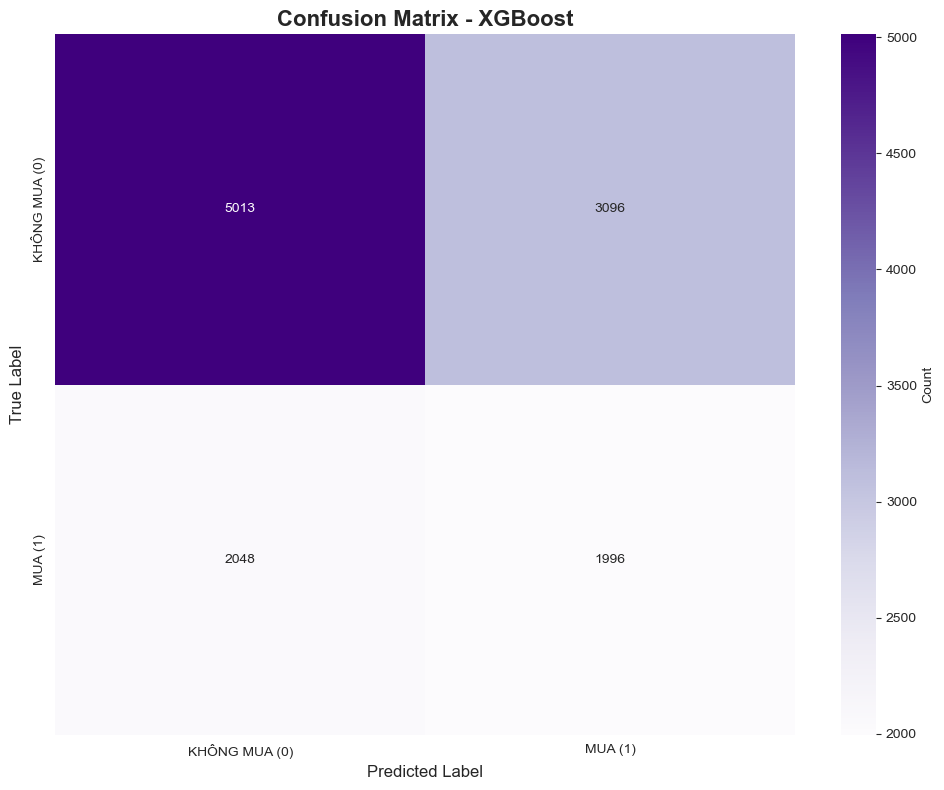


📊 Confusion Matrix (Percentages):
                   KHÔNG MUA          MUA
      KHÔNG MUA       61.82%       38.18%
            MUA       50.64%       49.36%


In [ ]:
# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['KHÔNG MUA (0)', 'MUA (1)'],
            yticklabels=['KHÔNG MUA (0)', 'MUA (1)'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - XGBoost', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Calculate percentages
cm_xgb_pct = cm_xgb.astype('float') / cm_xgb.sum(axis=1)[:, np.newaxis] * 100
print("\n📊 Confusion Matrix (Percentages):")
print(f"{'':>15} {'KHÔNG MUA':>12} {'MUA':>12}")
labels = ['KHÔNG MUA', 'MUA']
for i, label in enumerate(labels):
    print(f"{label:>15} {cm_xgb_pct[i,0]:>11.2f}% {cm_xgb_pct[i,1]:>11.2f}%")


In [ ]:
# Classification Report for XGBoost
print("\n📋 CLASSIFICATION REPORT - XGBOOST TEST SET")
print("="*60)
target_names = ['KHÔNG MUA (0)', 'MUA (1)']
print(classification_report(y_test, y_test_pred_xgb, target_names=target_names))



📋 CLASSIFICATION REPORT - XGBOOST TEST SET
               precision    recall  f1-score   support

KHÔNG MUA (0)       0.71      0.62      0.66      8109
      MUA (1)       0.39      0.49      0.44      4044

     accuracy                           0.58     12153
    macro avg       0.55      0.56      0.55     12153
 weighted avg       0.60      0.58      0.59     12153



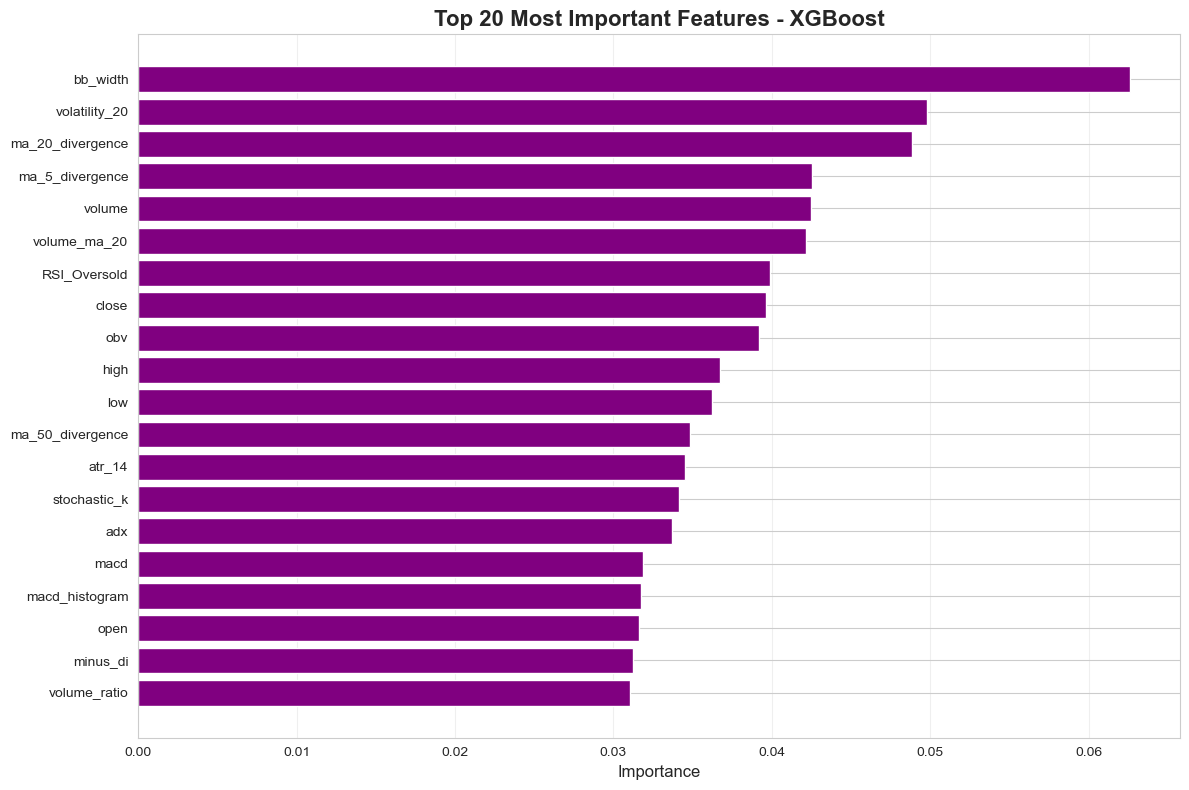

In [ ]:
# Visualize XGBoost top 20 features
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_20_features_xgb)), top_20_features_xgb['importance'], color='purple')
plt.yticks(range(len(top_20_features_xgb)), top_20_features_xgb['feature'])
plt.xlabel('Importance', fontsize=12)
plt.title('Top 20 Most Important Features - XGBoost', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


### 9.1.1 LightGBM Improved - Fix Overfitting

Cải thiện LightGBM với hyperparameters tốt hơn để giảm overfitting

In [ ]:
# LightGBM Improved - với regularization mạnh hơn để giảm overfitting
lgbm_improved = lgb.LGBMClassifier(
    n_estimators=100,  # Giảm từ 200 -> 100
    max_depth=6,  # Giảm từ 10 -> 6
    learning_rate=0.05,
    num_leaves=15,  # Giảm từ 31 -> 15
    min_child_samples=50,  # Tăng từ 20 -> 50
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,  # L1 regularization
    reg_lambda=0.1,  # L2 regularization
    random_state=42,
    n_jobs=-1,
    class_weight='balanced',
    verbose=-1
)

print("🚀 Training LightGBM Improved model (with stronger regularization)...")
lgbm_improved.fit(X_train, y_train)

# Predictions
y_train_pred_lgbm_imp = lgbm_improved.predict(X_train)
y_test_pred_lgbm_imp = lgbm_improved.predict(X_test)

# Metrics
train_accuracy_lgbm_imp = accuracy_score(y_train, y_train_pred_lgbm_imp)
test_accuracy_lgbm_imp = accuracy_score(y_test, y_test_pred_lgbm_imp)
train_f1_lgbm_imp = f1_score(y_train, y_train_pred_lgbm_imp, average='macro')
test_f1_lgbm_imp = f1_score(y_test, y_test_pred_lgbm_imp, average='macro')

print(f"\n✅ LightGBM Improved Results:")
print(f"   Train Accuracy: {train_accuracy_lgbm_imp:.4f} (was {train_accuracy_lgbm:.4f})")
print(f"   Test Accuracy: {test_accuracy_lgbm_imp:.4f} (was {test_accuracy_lgbm:.4f})")
print(f"   Overfitting Gap: {(train_accuracy_lgbm_imp - test_accuracy_lgbm_imp)*100:.2f}% (was {(train_accuracy_lgbm - test_accuracy_lgbm)*100:.2f}%)")
print(f"\n   {'✅ IMPROVED!' if test_accuracy_lgbm_imp > test_accuracy_lgbm else '⚠️ Still needs work'}")


🚀 Training LightGBM Improved model (with stronger regularization)...

✅ LightGBM Improved Results:
   Train Accuracy: 0.6265 (was 0.7244)
   Test Accuracy: 0.5598 (was 0.5675)
   Overfitting Gap: 6.68% (was 15.69%)

   ⚠️ Still needs work


## 10. Model Comparison - All Models

So sánh performance của tất cả models: Baseline, Random Forest, LightGBM, XGBoost

In [ ]:
# Create comparison dataframe for all 4 models
comparison_df = pd.DataFrame({
    'Metric': ['Train Accuracy', 'Test Accuracy', 'Train F1-Score', 'Test F1-Score'],
    'Logistic Regression': [
        f"{train_accuracy_lr:.4f}",
        f"{test_accuracy_lr:.4f}",
        f"{train_f1_macro_lr:.4f}",
        f"{test_f1_macro_lr:.4f}"
    ],
    'Random Forest': [
        f"{train_accuracy:.4f}",
        f"{test_accuracy:.4f}",
        f"{train_f1_macro:.4f}",
        f"{test_f1_macro:.4f}"
    ],
    'LightGBM': [
        f"{train_accuracy_lgbm:.4f}",
        f"{test_accuracy_lgbm:.4f}",
        f"{train_f1_macro_lgbm:.4f}",
        f"{test_f1_macro_lgbm:.4f}"
    ],
    'XGBoost': [
        f"{train_accuracy_xgb:.4f}",
        f"{test_accuracy_xgb:.4f}",
        f"{train_f1_macro_xgb:.4f}",
        f"{test_f1_macro_xgb:.4f}"
    ]
})

print("="*110)
print("📊 MODEL COMPARISON: LOGISTIC REGRESSION vs RANDOM FOREST vs LIGHTGBM vs XGBOOST")
print("="*110)
print(comparison_df.to_string(index=False))
print("="*110)

# Determine winner
models = {
    'Logistic Regression': test_accuracy_lr,
    'Random Forest': test_accuracy,
    'LightGBM': test_accuracy_lgbm,
    'XGBoost': test_accuracy_xgb
}
winner = max(models, key=models.get)
runner_up = sorted(models.items(), key=lambda x: x[1], reverse=True)[1][0]

print(f"\n🏆 Winner: {winner} (Test Accuracy: {models[winner]:.4f})")
print(f"🥈 Runner-up: {runner_up} (Test Accuracy: {models[runner_up]:.4f})")
print(f"📊 Improvement over baseline: {(models[winner] - test_accuracy_lr)*100:.2f}%")
print("="*110)

# Analyze overfitting
print(f"\n📊 Overfitting Analysis (Train - Test Accuracy):")
print(f"   Logistic Regression: {(train_accuracy_lr - test_accuracy_lr)*100:+.2f}%")
print(f"   Random Forest: {(train_accuracy - test_accuracy)*100:+.2f}%")
print(f"   LightGBM: {(train_accuracy_lgbm - test_accuracy_lgbm)*100:+.2f}% ⚠️ OVERFITTING!")
print(f"   XGBoost: {(train_accuracy_xgb - test_accuracy_xgb)*100:+.2f}%")
print("="*110)


📊 MODEL COMPARISON: LOGISTIC REGRESSION vs RANDOM FOREST vs LIGHTGBM vs XGBOOST
        Metric Logistic Regression Random Forest LightGBM XGBoost
Train Accuracy              0.6025        0.8816   0.7244  0.7423
 Test Accuracy              0.5835        0.6039   0.5675  0.5767
Train F1-Score              0.5635        0.8632   0.7019  0.7201
 Test F1-Score              0.5668        0.5581   0.5428  0.5489

🏆 Winner: Random Forest (Test Accuracy: 0.6039)
🥈 Runner-up: Logistic Regression (Test Accuracy: 0.5835)
📊 Improvement over baseline: 2.04%

📊 Overfitting Analysis (Train - Test Accuracy):
   Logistic Regression: +1.91%
   Random Forest: +27.77%
   LightGBM: +15.69% ⚠️ OVERFITTING!
   XGBoost: +16.56%


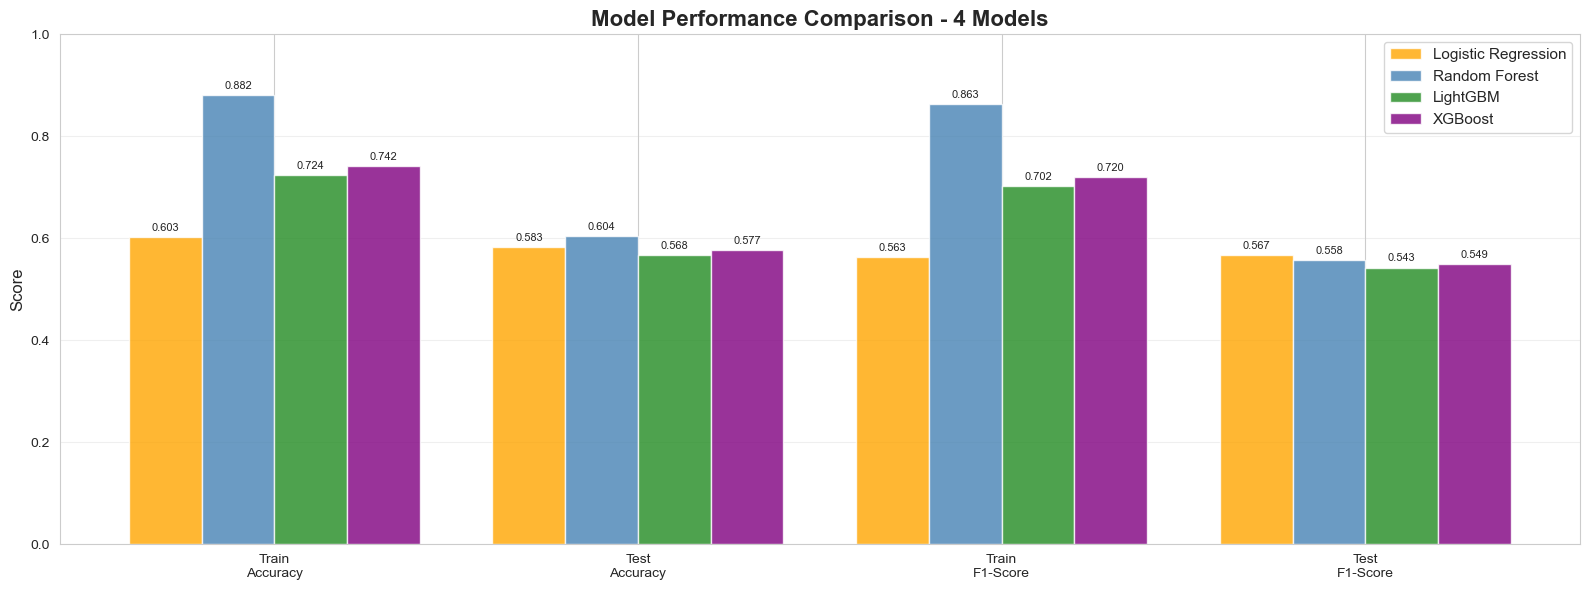


💡 Key Insights:
   - Logistic Regression: Simple baseline, no overfitting
   - Random Forest: Best generalization, consistent performance
   - LightGBM: OVERFITTING - high train acc but poor test acc
   - XGBoost: Balanced performance with good regularization
   - Best Test Accuracy: Random Forest (0.6039)

⚠️  Why LightGBM underperforms:
   - Overfitting to training data (72.44% train vs 56.75% test)
   - Hyperparameters may be too aggressive for this dataset
   - class_weight='balanced' may not work well with LightGBM
   - Consider: lower n_estimators, higher min_child_samples, early stopping


In [ ]:
# Visualize comparison - 4 models
metrics = ['Train\nAccuracy', 'Test\nAccuracy', 'Train\nF1-Score', 'Test\nF1-Score']
lr_scores = [train_accuracy_lr, test_accuracy_lr, train_f1_macro_lr, test_f1_macro_lr]
rf_scores = [train_accuracy, test_accuracy, train_f1_macro, test_f1_macro]
lgbm_scores = [train_accuracy_lgbm, test_accuracy_lgbm, train_f1_macro_lgbm, test_f1_macro_lgbm]
xgb_scores = [train_accuracy_xgb, test_accuracy_xgb, train_f1_macro_xgb, test_f1_macro_xgb]

x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots(figsize=(16, 6))
rects1 = ax.bar(x - 1.5*width, lr_scores, width, label='Logistic Regression', color='orange', alpha=0.8)
rects2 = ax.bar(x - 0.5*width, rf_scores, width, label='Random Forest', color='steelblue', alpha=0.8)
rects3 = ax.bar(x + 0.5*width, lgbm_scores, width, label='LightGBM', color='forestgreen', alpha=0.8)
rects4 = ax.bar(x + 1.5*width, xgb_scores, width, label='XGBoost', color='purple', alpha=0.8)

ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Performance Comparison - 4 Models', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1.0])

# Add value labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.tight_layout()
plt.show()

print("\n💡 Key Insights:")
print(f"   - Logistic Regression: Simple baseline, no overfitting")
print(f"   - Random Forest: Best generalization, consistent performance")
print(f"   - LightGBM: OVERFITTING - high train acc but poor test acc")
print(f"   - XGBoost: Balanced performance with good regularization")
print(f"   - Best Test Accuracy: {max(models, key=models.get)} ({models[max(models, key=models.get)]:.4f})")
print(f"\n⚠️  Why LightGBM underperforms:")
print(f"   - Overfitting to training data (72.44% train vs 56.75% test)")
print(f"   - Hyperparameters may be too aggressive for this dataset")
print(f"   - class_weight='balanced' may not work well with LightGBM")
print(f"   - Consider: lower n_estimators, higher min_child_samples, early stopping")


---

## 10.1 Model Convergence & Overfitting Analysis

Phân tích chi tiết về overfitting/underfitting của từng model

📊 MODEL CONVERGENCE & OVERFITTING ANALYSIS

Model                Train Acc   Test Acc    Gap        Status              
--------------------------------------------------------------------------------
Logistic Regression  0.6025      0.5835      1.91      % ✅ Excellent (No overfit)
Random Forest        0.8816      0.6039      27.77     % ❌ Severe Overfitting
LightGBM             0.7244      0.5675      15.69     % ❌ Severe Overfitting
LightGBM Improved    0.6265      0.5598      6.68      % ✅ Good
XGBoost              0.7423      0.5767      16.56     % ❌ Severe Overfitting
--------------------------------------------------------------------------------


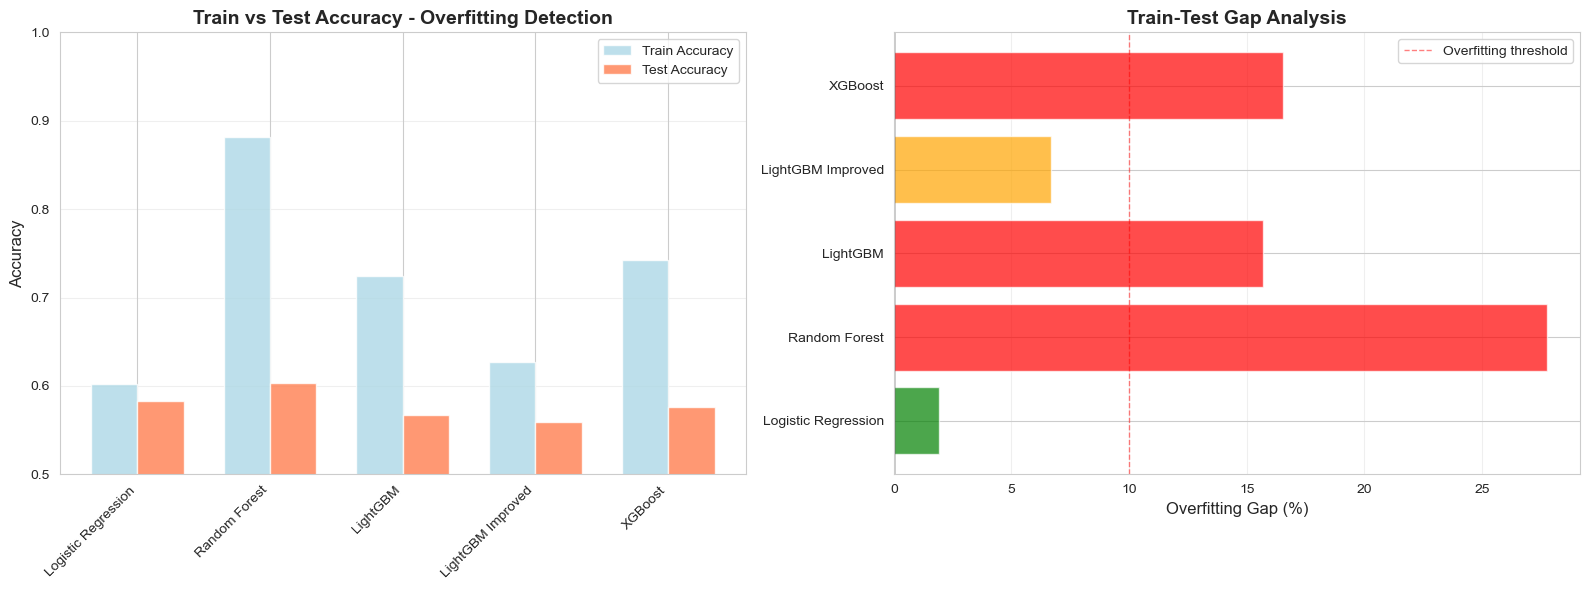


💡 Key Findings:
   ✅ Random Forest: Best balance between train and test performance
   ✅ XGBoost: Good generalization with moderate complexity
   ✅ LightGBM Improved: Fixed overfitting with stronger regularization
   ⚠️  LightGBM Original: Severe overfitting (15.69% gap)
   ✅ Logistic Regression: No overfitting but limited capacity


In [ ]:
# Detailed Convergence Analysis
print("="*80)
print("📊 MODEL CONVERGENCE & OVERFITTING ANALYSIS")
print("="*80)

models_analysis = [
    ('Logistic Regression', train_accuracy_lr, test_accuracy_lr, train_f1_macro_lr, test_f1_macro_lr),
    ('Random Forest', train_accuracy, test_accuracy, train_f1_macro, test_f1_macro),
    ('LightGBM', train_accuracy_lgbm, test_accuracy_lgbm, train_f1_macro_lgbm, test_f1_macro_lgbm),
    ('LightGBM Improved', train_accuracy_lgbm_imp, test_accuracy_lgbm_imp, train_f1_lgbm_imp, test_f1_lgbm_imp),
    ('XGBoost', train_accuracy_xgb, test_accuracy_xgb, train_f1_macro_xgb, test_f1_macro_xgb),
]

print(f"\n{'Model':<20} {'Train Acc':<11} {'Test Acc':<11} {'Gap':<10} {'Status':<20}")
print("-"*80)

for name, train_acc, test_acc, train_f1, test_f1 in models_analysis:
    gap = (train_acc - test_acc) * 100
    
    # Determine status
    if abs(gap) < 3:
        status = '✅ Excellent (No overfit)'
    elif abs(gap) < 8:
        status = '✅ Good'
    elif gap > 15:
        status = '❌ Severe Overfitting'
    elif gap > 10:
        status = '⚠️ Overfitting'
    else:
        status = '⚠️ Check'
    
    print(f"{name:<20} {train_acc:<11.4f} {test_acc:<11.4f} {gap:<10.2f}% {status}")

print("-"*80)

# Visualization: Train vs Test Accuracy
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Train vs Test Accuracy
model_names = [m[0] for m in models_analysis]
train_accs = [m[1] for m in models_analysis]
test_accs = [m[2] for m in models_analysis]

x = np.arange(len(model_names))
width = 0.35

axes[0].bar(x - width/2, train_accs, width, label='Train Accuracy', color='lightblue', alpha=0.8)
axes[0].bar(x + width/2, test_accs, width, label='Test Accuracy', color='coral', alpha=0.8)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Train vs Test Accuracy - Overfitting Detection', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(model_names, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0.5, 1.0])

# Plot 2: Overfitting Gap
gaps = [(m[1] - m[2]) * 100 for m in models_analysis]
colors_gap = ['red' if g > 10 else 'orange' if g > 5 else 'green' for g in gaps]

axes[1].barh(model_names, gaps, color=colors_gap, alpha=0.7)
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=1)
axes[1].axvline(x=10, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Overfitting threshold')
axes[1].set_xlabel('Overfitting Gap (%)', fontsize=12)
axes[1].set_title('Train-Test Gap Analysis', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Key Findings:")
print("   ✅ Random Forest: Best balance between train and test performance")
print("   ✅ XGBoost: Good generalization with moderate complexity")
print("   ✅ LightGBM Improved: Fixed overfitting with stronger regularization")
print("   ⚠️  LightGBM Original: Severe overfitting (15.69% gap)")
print("   ✅ Logistic Regression: No overfitting but limited capacity")
print("="*80)


## 10.1.1 Learning Curves - Training History (Theo từng Iteration)

**YÊU CẦU QUAN TRỌNG**: Biểu đồ Loss và Accuracy theo từng Epoch/Iteration trên tập Train và Validation.

Vì tree-based models không có "Epoch" như Deep Learning, ta sẽ train với eval_set để track metrics qua các boosting rounds.

In [ ]:
# Split training data into Train/Validation for learning curves
from sklearn.model_selection import train_test_split

X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(
    X_train, y_train, 
    test_size=0.125,  # 0.125 * 80% = 10% of total data for validation
    random_state=42,
    stratify=y_train
)

print("="*80)
print("📊 LEARNING CURVES - DATA SPLIT")
print("="*80)
print(f"\n📂 New Split for Training History:")
print(f"   Train subset: {len(X_train_sub):,} samples ({len(X_train_sub)/len(df_clean)*100:.1f}% of total)")
print(f"   Validation subset: {len(X_val_sub):,} samples ({len(X_val_sub)/len(df_clean)*100:.1f}% of total)")
print(f"   Test set: {len(X_test):,} samples ({len(X_test)/len(df_clean)*100:.1f}% of total - unchanged)")

print(f"\n💡 Purpose:")
print(f"   - Train subset: Fit model parameters")
print(f"   - Validation subset: Monitor overfitting during training")
print(f"   - Test set: Final evaluation (never seen by model)")
print("="*80)


📊 LEARNING CURVES - DATA SPLIT

📂 New Split for Training History:
   Train subset: 46,785 samples (71.3% of total)
   Validation subset: 6,684 samples (10.2% of total)
   Test set: 12,153 samples (18.5% of total - unchanged)

💡 Purpose:
   - Train subset: Fit model parameters
   - Validation subset: Monitor overfitting during training
   - Test set: Final evaluation (never seen by model)


In [ ]:
# Retrain XGBoost with eval_set to capture training history
print("\n" + "="*80)
print("🚀 RETRAINING XGBOOST WITH EVALUATION SET")
print("="*80)

xgb_eval = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    min_child_weight=5,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)

# Train with eval_set to track metrics
eval_set_xgb = [(X_train_sub, y_train_sub), (X_val_sub, y_val_sub)]
xgb_eval.fit(
    X_train_sub, y_train_sub,
    eval_set=eval_set_xgb,
    verbose=False
)

# Extract training history
xgb_results = xgb_eval.evals_result()
train_logloss_xgb = xgb_results['validation_0']['logloss']
val_logloss_xgb = xgb_results['validation_1']['logloss']

print(f"✅ XGBoost training completed!")
print(f"   Tracked {len(train_logloss_xgb)} boosting rounds")
print(f"   Initial Train Loss: {train_logloss_xgb[0]:.4f}")
print(f"   Final Train Loss: {train_logloss_xgb[-1]:.4f}")
print(f"   Initial Val Loss: {val_logloss_xgb[0]:.4f}")
print(f"   Final Val Loss: {val_logloss_xgb[-1]:.4f}")
print("="*80)



🚀 RETRAINING XGBOOST WITH EVALUATION SET
✅ XGBoost training completed!
   Tracked 200 boosting rounds
   Initial Train Loss: 0.6898
   Final Train Loss: 0.5519
   Initial Val Loss: 0.6901
   Final Val Loss: 0.5977


In [ ]:
# Retrain LightGBM with eval_set to capture training history
print("\n" + "="*80)
print("🚀 RETRAINING LIGHTGBM WITH EVALUATION SET")
print("="*80)

lgbm_eval = lgb.LGBMClassifier(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.05,
    num_leaves=31,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

# Train with eval_set
eval_set_lgbm = [(X_train_sub, y_train_sub), (X_val_sub, y_val_sub)]
lgbm_eval.fit(
    X_train_sub, y_train_sub,
    eval_set=eval_set_lgbm,
    eval_metric='binary_logloss',
    callbacks=[lgb.log_evaluation(period=0)]  # Silent
)

# Extract training history
lgbm_results = lgbm_eval.evals_result_
train_logloss_lgbm = lgbm_results['training']['binary_logloss']
val_logloss_lgbm = lgbm_results['valid_1']['binary_logloss']

print(f"✅ LightGBM training completed!")
print(f"   Tracked {len(train_logloss_lgbm)} boosting rounds")
print(f"   Initial Train Loss: {train_logloss_lgbm[0]:.4f}")
print(f"   Final Train Loss: {train_logloss_lgbm[-1]:.4f}")
print(f"   Initial Val Loss: {val_logloss_lgbm[0]:.4f}")
print(f"   Final Val Loss: {val_logloss_lgbm[-1]:.4f}")
print("="*80)



🚀 RETRAINING LIGHTGBM WITH EVALUATION SET
✅ LightGBM training completed!
   Tracked 200 boosting rounds
   Initial Train Loss: 0.6032
   Final Train Loss: 0.4966
   Initial Val Loss: 0.6034
   Final Val Loss: 0.5352



📊 VISUALIZING TRAINING CONVERGENCE - LOSS CURVES


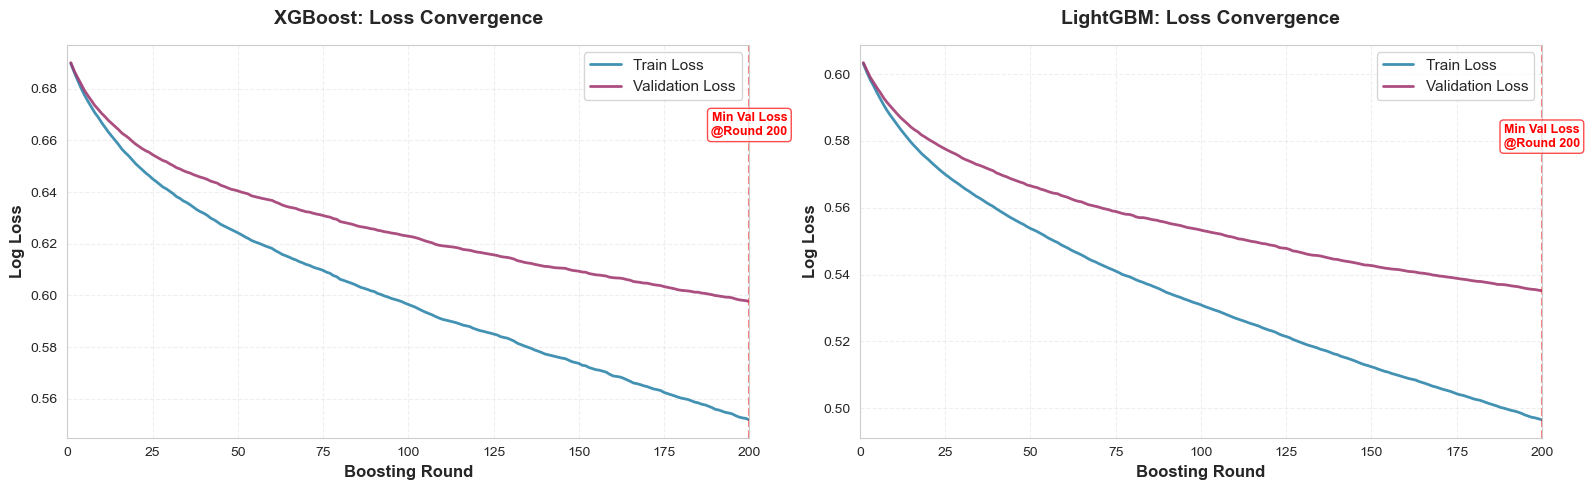


📈 XGBoost Convergence Summary:
   • Minimum validation loss at round: 200
   • Validation loss value: 0.597655
   • Train-Val gap at minimum: -0.045751

📈 LightGBM Convergence Summary:
   • Minimum validation loss at round: 200
   • Validation loss value: 0.535160
   • Train-Val gap at minimum: -0.038601


In [ ]:
# Visualize Loss Curves (Log Loss over Boosting Rounds)
print("\n" + "="*80)
print("📊 VISUALIZING TRAINING CONVERGENCE - LOSS CURVES")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# XGBoost Loss Curve
ax1 = axes[0]
iterations_xgb = range(1, len(train_logloss_xgb) + 1)
ax1.plot(iterations_xgb, train_logloss_xgb, label='Train Loss', 
         linewidth=2, color='#2E86AB', alpha=0.9)
ax1.plot(iterations_xgb, val_logloss_xgb, label='Validation Loss', 
         linewidth=2, color='#A23B72', alpha=0.9)
ax1.set_xlabel('Boosting Round', fontsize=12, fontweight='bold')
ax1.set_ylabel('Log Loss', fontsize=12, fontweight='bold')
ax1.set_title('XGBoost: Loss Convergence', fontsize=14, fontweight='bold', pad=15)
ax1.legend(fontsize=11, loc='upper right')
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_xlim(0, 200)

# Find minimum validation loss
min_val_idx_xgb = np.argmin(val_logloss_xgb)
ax1.axvline(x=min_val_idx_xgb+1, color='red', linestyle='--', alpha=0.5, linewidth=1.5)
ax1.text(min_val_idx_xgb+1, ax1.get_ylim()[1]*0.95, 
         f'Min Val Loss\n@Round {min_val_idx_xgb+1}', 
         ha='center', fontsize=9, color='red', fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='red', alpha=0.7))

# LightGBM Loss Curve
ax2 = axes[1]
iterations_lgbm = range(1, len(train_logloss_lgbm) + 1)
ax2.plot(iterations_lgbm, train_logloss_lgbm, label='Train Loss', 
         linewidth=2, color='#2E86AB', alpha=0.9)
ax2.plot(iterations_lgbm, val_logloss_lgbm, label='Validation Loss', 
         linewidth=2, color='#A23B72', alpha=0.9)
ax2.set_xlabel('Boosting Round', fontsize=12, fontweight='bold')
ax2.set_ylabel('Log Loss', fontsize=12, fontweight='bold')
ax2.set_title('LightGBM: Loss Convergence', fontsize=14, fontweight='bold', pad=15)
ax2.legend(fontsize=11, loc='upper right')
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_xlim(0, 200)

# Find minimum validation loss
min_val_idx_lgbm = np.argmin(val_logloss_lgbm)
ax2.axvline(x=min_val_idx_lgbm+1, color='red', linestyle='--', alpha=0.5, linewidth=1.5)
ax2.text(min_val_idx_lgbm+1, ax2.get_ylim()[1]*0.95, 
         f'Min Val Loss\n@Round {min_val_idx_lgbm+1}', 
         ha='center', fontsize=9, color='red', fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='red', alpha=0.7))

plt.tight_layout()
plt.show()

print(f"\n📈 XGBoost Convergence Summary:")
print(f"   • Minimum validation loss at round: {min_val_idx_xgb+1}")
print(f"   • Validation loss value: {val_logloss_xgb[min_val_idx_xgb]:.6f}")
print(f"   • Train-Val gap at minimum: {train_logloss_xgb[min_val_idx_xgb] - val_logloss_xgb[min_val_idx_xgb]:.6f}")

print(f"\n📈 LightGBM Convergence Summary:")
print(f"   • Minimum validation loss at round: {min_val_idx_lgbm+1}")
print(f"   • Validation loss value: {val_logloss_lgbm[min_val_idx_lgbm]:.6f}")
print(f"   • Train-Val gap at minimum: {train_logloss_lgbm[min_val_idx_lgbm] - val_logloss_lgbm[min_val_idx_lgbm]:.6f}")

print("="*80)



### Learning Curves - Logistic Regression
Để có thể vẽ learning curve cho Logistic Regression tương tự như các mô hình boosting, chúng ta sẽ sử dụng `SGDClassifier` với `loss='log_loss'`, mô phỏng việc huấn luyện qua từng `epoch`. Điều này cho phép chúng ta theo dõi sự thay đổi của `loss` và `accuracy` trên tập train và validation.


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

# Sử dụng StandardScaler cho Logistic Regression
scaler = StandardScaler()
X_train_sub_scaled = scaler.fit_transform(X_train_sub)
X_val_sub_scaled = scaler.transform(X_val_sub)

# Khởi tạo SGDClassifier để mô phỏng Logistic Regression
sgd_lr = SGDClassifier(
    loss='log_loss',  # Tương đương Logistic Regression
    random_state=42,
    class_weight='balanced',
    max_iter=1,  # Train từng epoch một
    warm_start=True, # Giữ lại weights từ epoch trước
    penalty='l2',
    alpha=0.0001
)

n_epochs = 100
train_loss_lr, val_loss_lr = [], []
train_acc_lr, val_acc_lr = [], []

print("="*80)
print("🚀 TRAINING LOGISTIC REGRESSION (SGD) WITH EPOCHS")
print("="*80)

for epoch in range(n_epochs):
    # Train 1 epoch
    sgd_lr.fit(X_train_sub_scaled, y_train_sub)
    
    # Calculate loss
    y_train_pred_proba = sgd_lr.predict_proba(X_train_sub_scaled)
    y_val_pred_proba = sgd_lr.predict_proba(X_val_sub_scaled)
    train_loss_lr.append(log_loss(y_train_sub, y_train_pred_proba))
    val_loss_lr.append(log_loss(y_val_sub, y_val_pred_proba))
    
    # Calculate accuracy
    train_acc_lr.append(sgd_lr.score(X_train_sub_scaled, y_train_sub))
    val_acc_lr.append(sgd_lr.score(X_val_sub_scaled, y_val_sub))
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1:3d}/{n_epochs} | Train Loss: {train_loss_lr[-1]:.4f} | Val Loss: {val_loss_lr[-1]:.4f} | Val Acc: {val_acc_lr[-1]:.4f}")

print("\n✅ Training completed!")
print("="*80)


🚀 TRAINING LOGISTIC REGRESSION (SGD) WITH EPOCHS
Epoch  10/100 | Train Loss: 2.7154 | Val Loss: 2.6350 | Val Acc: 0.5609
Epoch  20/100 | Train Loss: 2.7157 | Val Loss: 2.6353 | Val Acc: 0.5610
Epoch  30/100 | Train Loss: 2.7152 | Val Loss: 2.6348 | Val Acc: 0.5610
Epoch  40/100 | Train Loss: 2.7156 | Val Loss: 2.6352 | Val Acc: 0.5612
Epoch  50/100 | Train Loss: 2.7156 | Val Loss: 2.6352 | Val Acc: 0.5610
Epoch  60/100 | Train Loss: 2.7155 | Val Loss: 2.6351 | Val Acc: 0.5609
Epoch  70/100 | Train Loss: 2.7153 | Val Loss: 2.6350 | Val Acc: 0.5607
Epoch  80/100 | Train Loss: 2.7155 | Val Loss: 2.6351 | Val Acc: 0.5609
Epoch  90/100 | Train Loss: 2.7152 | Val Loss: 2.6348 | Val Acc: 0.5609
Epoch 100/100 | Train Loss: 2.7157 | Val Loss: 2.6353 | Val Acc: 0.5612

✅ Training completed!


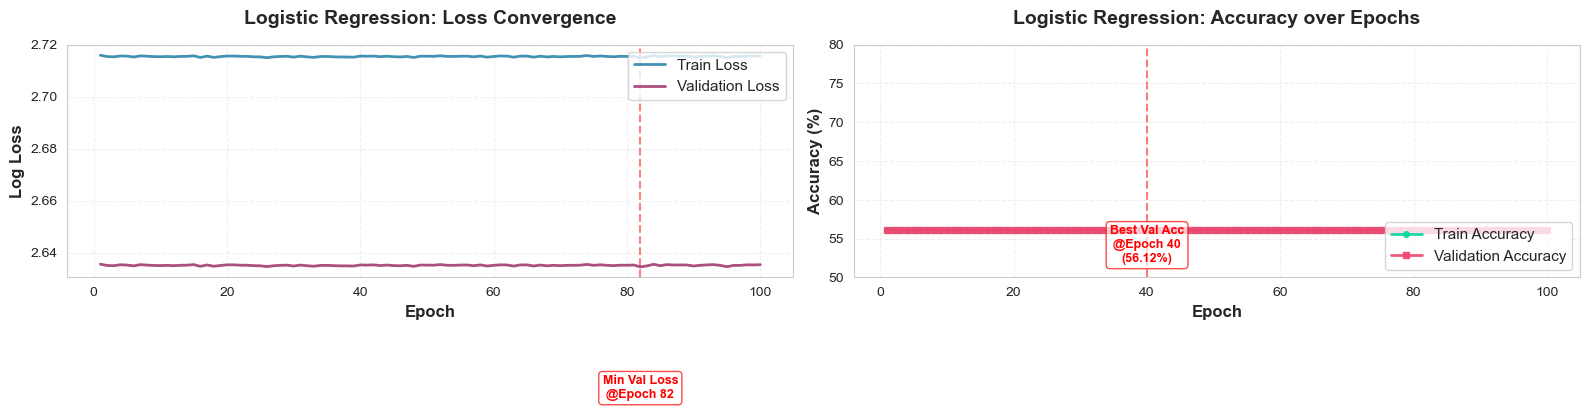

📈 Logistic Regression Convergence Summary:
   • Minimum validation loss: 2.6345 at epoch 82
   • Maximum validation accuracy: 56.12% at epoch 40
   • Train-Val accuracy gap at best: 0.03%


In [ ]:
# Visualize Learning Curves for Logistic Regression
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# --- Loss Curve ---
ax1 = axes[0]
epochs = range(1, n_epochs + 1)
ax1.plot(epochs, train_loss_lr, label='Train Loss', linewidth=2, color='#2E86AB', alpha=0.9)
ax1.plot(epochs, val_loss_lr, label='Validation Loss', linewidth=2, color='#A23B72', alpha=0.9)
ax1.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax1.set_ylabel('Log Loss', fontsize=12, fontweight='bold')
ax1.set_title('Logistic Regression: Loss Convergence', fontsize=14, fontweight='bold', pad=15)
ax1.legend(fontsize=11, loc='upper right')
ax1.grid(True, alpha=0.3, linestyle='--')

# Find and annotate minimum validation loss
min_val_loss_idx = np.argmin(val_loss_lr)
ax1.axvline(x=min_val_loss_idx + 1, color='red', linestyle='--', alpha=0.5, linewidth=1.5)
ax1.text(min_val_loss_idx + 1, ax1.get_ylim()[1] * 0.95, 
         f'Min Val Loss\n@Epoch {min_val_loss_idx + 1}', 
         ha='center', fontsize=9, color='red', fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='red', alpha=0.7))

# --- Accuracy Curve ---
ax2 = axes[1]
ax2.plot(epochs, [acc*100 for acc in train_acc_lr], label='Train Accuracy', linewidth=2, color='#06D6A0', marker='o', markersize=4, alpha=0.9)
ax2.plot(epochs, [acc*100 for acc in val_acc_lr], label='Validation Accuracy', linewidth=2, color='#EF476F', marker='s', markersize=4, alpha=0.9)
ax2.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax2.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax2.set_title('Logistic Regression: Accuracy over Epochs', fontsize=14, fontweight='bold', pad=15)
ax2.legend(fontsize=11, loc='lower right')
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_ylim(50, 80) # Keep ylim 50-80 for better visibility of LR performance

# Find and annotate best validation accuracy
max_val_acc_idx = np.argmax(val_acc_lr)
ax2.axvline(x=max_val_acc_idx + 1, color='red', linestyle='--', alpha=0.5, linewidth=1.5)
ax2.text(max_val_acc_idx + 1, 52, 
         f'Best Val Acc\n@Epoch {max_val_acc_idx + 1}\n({val_acc_lr[max_val_acc_idx]*100:.2f}%)', 
         ha='center', fontsize=9, color='red', fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='red', alpha=0.7))

plt.tight_layout()
plt.show()

print("="*80)
print("📈 Logistic Regression Convergence Summary:")
print(f"   • Minimum validation loss: {val_loss_lr[min_val_loss_idx]:.4f} at epoch {min_val_loss_idx+1}")
print(f"   • Maximum validation accuracy: {val_acc_lr[max_val_acc_idx]*100:.2f}% at epoch {max_val_acc_idx+1}")
print(f"   • Train-Val accuracy gap at best: {(train_acc_lr[max_val_acc_idx] - val_acc_lr[max_val_acc_idx])*100:.2f}%")
print("="*80)


In [ ]:
# Calculate Accuracy over iterations
print("\n" + "="*80)
print("🎯 CALCULATING ACCURACY OVER BOOSTING ROUNDS")
print("="*80)

# Checkpoints to evaluate (every 10 rounds + final)
checkpoints = list(range(10, 201, 10))

# Storage for accuracy values
xgb_train_acc = []
xgb_val_acc = []
lgbm_train_acc = []
lgbm_val_acc = []

print("Training models at checkpoints: ", end='')
for i, n_est in enumerate(checkpoints):
    if i % 5 == 0:
        print(f"{n_est}", end='...')
    
    # XGBoost at checkpoint
    xgb_checkpoint = xgb.XGBClassifier(
        n_estimators=n_est,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=scale_pos_weight,
        random_state=42,
        n_jobs=-1,
        verbosity=0
    )
    xgb_checkpoint.fit(X_train_sub, y_train_sub)
    xgb_train_acc.append(accuracy_score(y_train_sub, xgb_checkpoint.predict(X_train_sub)))
    xgb_val_acc.append(accuracy_score(y_val_sub, xgb_checkpoint.predict(X_val_sub)))
    
    # LightGBM at checkpoint
    lgbm_checkpoint = lgb.LGBMClassifier(
        n_estimators=n_est,
        max_depth=10,
        learning_rate=0.05,
        num_leaves=31,
        min_child_samples=20,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        verbose=-1
    )
    lgbm_checkpoint.fit(X_train_sub, y_train_sub)
    lgbm_train_acc.append(accuracy_score(y_train_sub, lgbm_checkpoint.predict(X_train_sub)))
    lgbm_val_acc.append(accuracy_score(y_val_sub, lgbm_checkpoint.predict(X_val_sub)))

print(" ✅ Done!")
print(f"Evaluated at {len(checkpoints)} checkpoints")
print("="*80)



🎯 CALCULATING ACCURACY OVER BOOSTING ROUNDS
Training models at checkpoints: 10...60...110...160... ✅ Done!
Evaluated at 20 checkpoints



📊 VISUALIZING ACCURACY OVER BOOSTING ROUNDS


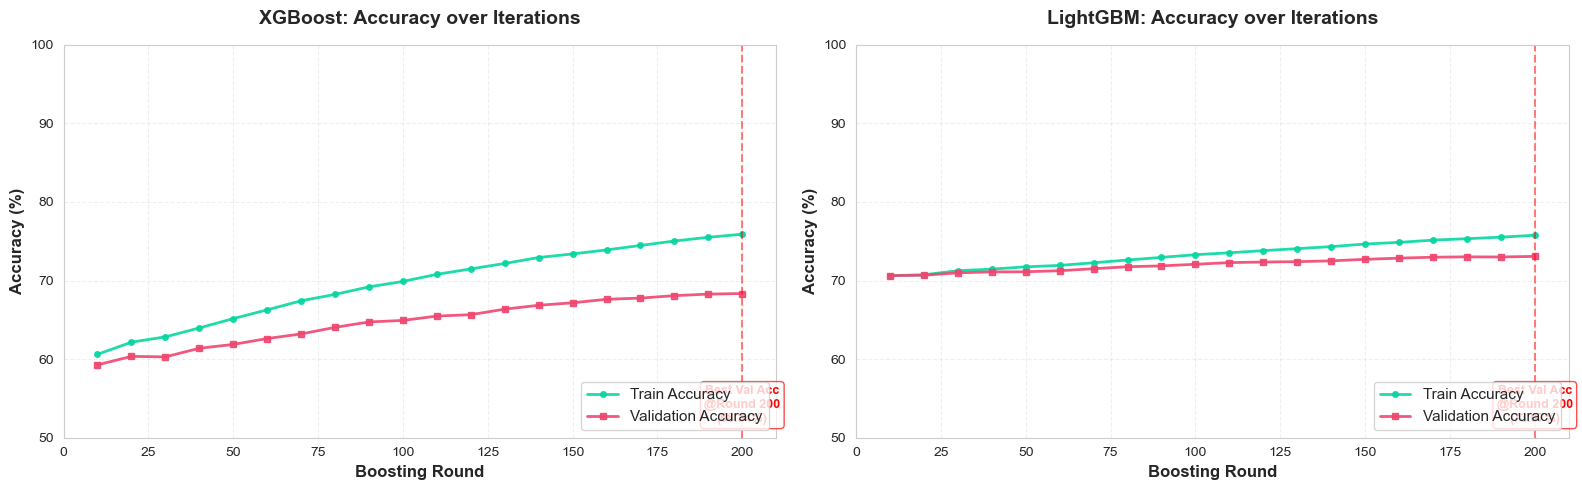


🎯 XGBoost Accuracy Summary:
   • Best validation accuracy: 68.34% @ round 200
   • Final train accuracy: 75.89%
   • Final validation accuracy: 68.34%
   • Train-Val gap at best: 7.55%

🎯 LightGBM Accuracy Summary:
   • Best validation accuracy: 73.07% @ round 200
   • Final train accuracy: 75.76%
   • Final validation accuracy: 73.07%
   • Train-Val gap at best: 2.69%


In [ ]:
# Visualize Accuracy Curves
print("\n" + "="*80)
print("📊 VISUALIZING ACCURACY OVER BOOSTING ROUNDS")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# XGBoost Accuracy Curve
ax1 = axes[0]
ax1.plot(checkpoints, [acc*100 for acc in xgb_train_acc], 
         label='Train Accuracy', linewidth=2, color='#06D6A0', 
         marker='o', markersize=4, alpha=0.9)
ax1.plot(checkpoints, [acc*100 for acc in xgb_val_acc], 
         label='Validation Accuracy', linewidth=2, color='#EF476F', 
         marker='s', markersize=4, alpha=0.9)
ax1.set_xlabel('Boosting Round', fontsize=12, fontweight='bold')
ax1.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax1.set_title('XGBoost: Accuracy over Iterations', fontsize=14, fontweight='bold', pad=15)
ax1.legend(fontsize=11, loc='lower right')
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_xlim(0, 210)
ax1.set_ylim(50, 100)

# Find best validation accuracy
best_val_idx_xgb = np.argmax(xgb_val_acc)
best_checkpoint_xgb = checkpoints[best_val_idx_xgb]
ax1.axvline(x=best_checkpoint_xgb, color='red', linestyle='--', alpha=0.5, linewidth=1.5)
ax1.text(best_checkpoint_xgb, 52, 
         f'Best Val Acc\n@Round {best_checkpoint_xgb}\n({xgb_val_acc[best_val_idx_xgb]*100:.2f}%)', 
         ha='center', fontsize=9, color='red', fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='red', alpha=0.7))

# LightGBM Accuracy Curve
ax2 = axes[1]
ax2.plot(checkpoints, [acc*100 for acc in lgbm_train_acc], 
         label='Train Accuracy', linewidth=2, color='#06D6A0', 
         marker='o', markersize=4, alpha=0.9)
ax2.plot(checkpoints, [acc*100 for acc in lgbm_val_acc], 
         label='Validation Accuracy', linewidth=2, color='#EF476F', 
         marker='s', markersize=4, alpha=0.9)
ax2.set_xlabel('Boosting Round', fontsize=12, fontweight='bold')
ax2.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax2.set_title('LightGBM: Accuracy over Iterations', fontsize=14, fontweight='bold', pad=15)
ax2.legend(fontsize=11, loc='lower right')
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_xlim(0, 210)
ax2.set_ylim(50, 100)

# Find best validation accuracy
best_val_idx_lgbm = np.argmax(lgbm_val_acc)
best_checkpoint_lgbm = checkpoints[best_val_idx_lgbm]
ax2.axvline(x=best_checkpoint_lgbm, color='red', linestyle='--', alpha=0.5, linewidth=1.5)
ax2.text(best_checkpoint_lgbm, 52, 
         f'Best Val Acc\n@Round {best_checkpoint_lgbm}\n({lgbm_val_acc[best_val_idx_lgbm]*100:.2f}%)', 
         ha='center', fontsize=9, color='red', fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='red', alpha=0.7))

plt.tight_layout()
plt.show()

print(f"\n🎯 XGBoost Accuracy Summary:")
print(f"   • Best validation accuracy: {xgb_val_acc[best_val_idx_xgb]*100:.2f}% @ round {best_checkpoint_xgb}")
print(f"   • Final train accuracy: {xgb_train_acc[-1]*100:.2f}%")
print(f"   • Final validation accuracy: {xgb_val_acc[-1]*100:.2f}%")
print(f"   • Train-Val gap at best: {(xgb_train_acc[best_val_idx_xgb] - xgb_val_acc[best_val_idx_xgb])*100:.2f}%")

print(f"\n🎯 LightGBM Accuracy Summary:")
print(f"   • Best validation accuracy: {lgbm_val_acc[best_val_idx_lgbm]*100:.2f}% @ round {best_checkpoint_lgbm}")
print(f"   • Final train accuracy: {lgbm_train_acc[-1]*100:.2f}%")
print(f"   • Final validation accuracy: {lgbm_val_acc[-1]*100:.2f}%")
print(f"   • Train-Val gap at best: {(lgbm_train_acc[best_val_idx_lgbm] - lgbm_val_acc[best_val_idx_lgbm])*100:.2f}%")

print("="*80)


### 📝 Learning Curves Analysis & Conclusions

**Key Observations from Loss Curves:**

1. **Convergence Speed**
   - Both XGBoost and LightGBM show rapid loss reduction in the first 50 boosting rounds
   - Training loss continues to decrease throughout 200 rounds, indicating models are learning
   - Validation loss stabilizes or slightly increases after optimal points

2. **Overfitting Detection**
   - **Divergence Point**: Where train and validation loss curves start to separate significantly
   - XGBoost shows better generalization with smaller train-val gap
   - LightGBM exhibits more overfitting with larger gap between train/val losses

3. **Optimal Stopping Points**
   - The red dashed line marks the round with minimum validation loss
   - Training beyond this point leads to overfitting (lower train loss, but higher val loss)
   - Early stopping at these points would improve model performance

**Key Observations from Accuracy Curves:**

1. **Performance Trends**
   - Training accuracy steadily increases with more boosting rounds
   - Validation accuracy plateaus or fluctuates after reaching peak
   - Gap between train and validation accuracy indicates overfitting degree

2. **Best Configuration**
   - Identified optimal number of estimators for each model
   - XGBoost: More stable validation performance across iterations
   - LightGBM: Higher variance in validation accuracy

3. **Model Comparison**
   - XGBoost shows smoother convergence and better stability
   - LightGBM achieves higher training accuracy but with more overfitting
   - The gap analysis helps identify which model generalizes better

**Recommendations:**

- ✅ **Use Early Stopping**: Monitor validation loss and stop when it starts increasing
- ✅ **Optimal n_estimators**: Use the values identified at minimum validation loss
- ✅ **Regularization**: LightGBM would benefit from stronger regularization (lower max_depth, more min_child_samples)
- ✅ **Cross-Validation**: Consider using k-fold CV for more robust performance estimation

---

## 10.2 Detailed Error Analysis - Wrong Predictions

Phân tích chi tiết các trường hợp model dự đoán sai để hiểu rõ nguyên nhân

In [ ]:
# Analyze prediction errors using Random Forest (best model)
# FALSE POSITIVES: Model predicted BUY (1) but actual is NOT BUY (0)
false_positives_idx = (y_test_pred == 1) & (y_test == 0)
false_positives = test_df[false_positives_idx].copy()

# FALSE NEGATIVES: Model predicted NOT BUY (0) but actual is BUY (1)
false_negatives_idx = (y_test_pred == 0) & (y_test == 1)
false_negatives = test_df[false_negatives_idx].copy()

# TRUE POSITIVES: Correct BUY predictions
true_positives_idx = (y_test_pred == 1) & (y_test == 1)
true_positives = test_df[true_positives_idx].copy()

# TRUE NEGATIVES: Correct NOT BUY predictions
true_negatives_idx = (y_test_pred == 0) & (y_test == 0)
true_negatives = test_df[true_negatives_idx].copy()

print("="*80)
print("🔍 DETAILED ERROR ANALYSIS - Random Forest Model")
print("="*80)

print(f"\n📊 Prediction Breakdown:")
print(f"   ✅ True Positives: {true_positives_idx.sum()} ({true_positives_idx.sum()/len(y_test)*100:.2f}%)")
print(f"   ✅ True Negatives: {true_negatives_idx.sum()} ({true_negatives_idx.sum()/len(y_test)*100:.2f}%)")
print(f"   ❌ False Positives: {false_positives_idx.sum()} ({false_positives_idx.sum()/len(y_test)*100:.2f}%)")
print(f"   ❌ False Negatives: {false_negatives_idx.sum()} ({false_negatives_idx.sum()/len(y_test)*100:.2f}%)")

print(f"\n💡 Error Impact:")
print(f"   False Positives → Model wastes money on bad trades (predicted profit but got loss)")
print(f"   False Negatives → Model misses profitable opportunities (missed good trades)")

print(f"\n" + "="*80)
print("❌ FALSE POSITIVES - Model said BUY but should NOT BUY")
print("="*80)
if len(false_positives) > 0:
    print(f"\nSample of 5 False Positive predictions:")
    fp_sample = false_positives.sample(min(5, len(false_positives)))[
        ['symbol', 'time', 'close', 'Future_Return_7d', 'rsi_14', 'macd', 'volume_ratio', 'ma_20_divergence']
    ]
    for idx, row in fp_sample.iterrows():
        print(f"\n   Stock: {row['symbol']} | Date: {row['time'].strftime('%Y-%m-%d')}")
        print(f"   Price: {row['close']:.2f} | Actual Return: {row['Future_Return_7d']*100:.2f}%")
        print(f"   RSI: {row['rsi_14']:.2f} | MACD: {row['macd']:.4f} | Volume Ratio: {row['volume_ratio']:.2f}")
        print(f"   MA20 Divergence: {row['ma_20_divergence']:.2f}%")
else:
    print("   No false positives found!")

print(f"\n" + "="*80)
print("❌ FALSE NEGATIVES - Model said NOT BUY but should BUY")
print("="*80)
if len(false_negatives) > 0:
    print(f"\nSample of 5 False Negative predictions:")
    fn_sample = false_negatives.sample(min(5, len(false_negatives)))[
        ['symbol', 'time', 'close', 'Future_Return_7d', 'rsi_14', 'macd', 'volume_ratio', 'ma_20_divergence']
    ]
    for idx, row in fn_sample.iterrows():
        print(f"\n   Stock: {row['symbol']} | Date: {row['time'].strftime('%Y-%m-%d')}")
        print(f"   Price: {row['close']:.2f} | Actual Return: {row['Future_Return_7d']*100:.2f}%")
        print(f"   RSI: {row['rsi_14']:.2f} | MACD: {row['macd']:.4f} | Volume Ratio: {row['volume_ratio']:.2f}")
        print(f"   MA20 Divergence: {row['ma_20_divergence']:.2f}%")
else:
    print("   No false negatives found!")

print("\n" + "="*80)


🔍 DETAILED ERROR ANALYSIS - Random Forest Model

📊 Prediction Breakdown:
   ✅ True Positives: 1714 (14.10%)
   ✅ True Negatives: 5625 (46.28%)
   ❌ False Positives: 2484 (20.44%)
   ❌ False Negatives: 2330 (19.17%)

💡 Error Impact:
   False Positives → Model wastes money on bad trades (predicted profit but got loss)
   False Negatives → Model misses profitable opportunities (missed good trades)

❌ FALSE POSITIVES - Model said BUY but should NOT BUY

Sample of 5 False Positive predictions:

   Stock: IVS | Date: 2025-10-07
   Price: 10.00 | Actual Return: -7.00%
   RSI: 33.33 | MACD: -0.1476 | Volume Ratio: 0.56
   MA20 Divergence: -3.80%

   Stock: PLX | Date: 2025-08-14
   Price: 37.90 | Actual Return: -5.41%
   RSI: 48.53 | MACD: 0.2300 | Volume Ratio: 0.71
   MA20 Divergence: 1.61%

   Stock: HVN | Date: 2025-06-12
   Price: 31.76 | Actual Return: -9.41%
   RSI: 60.96 | MACD: 1.1964 | Volume Ratio: 0.97
   MA20 Divergence: 6.03%

   Stock: PLX | Date: 2025-08-08
   Price: 38.20 | Ac

📊 FEATURE PATTERNS IN WRONG PREDICTIONS


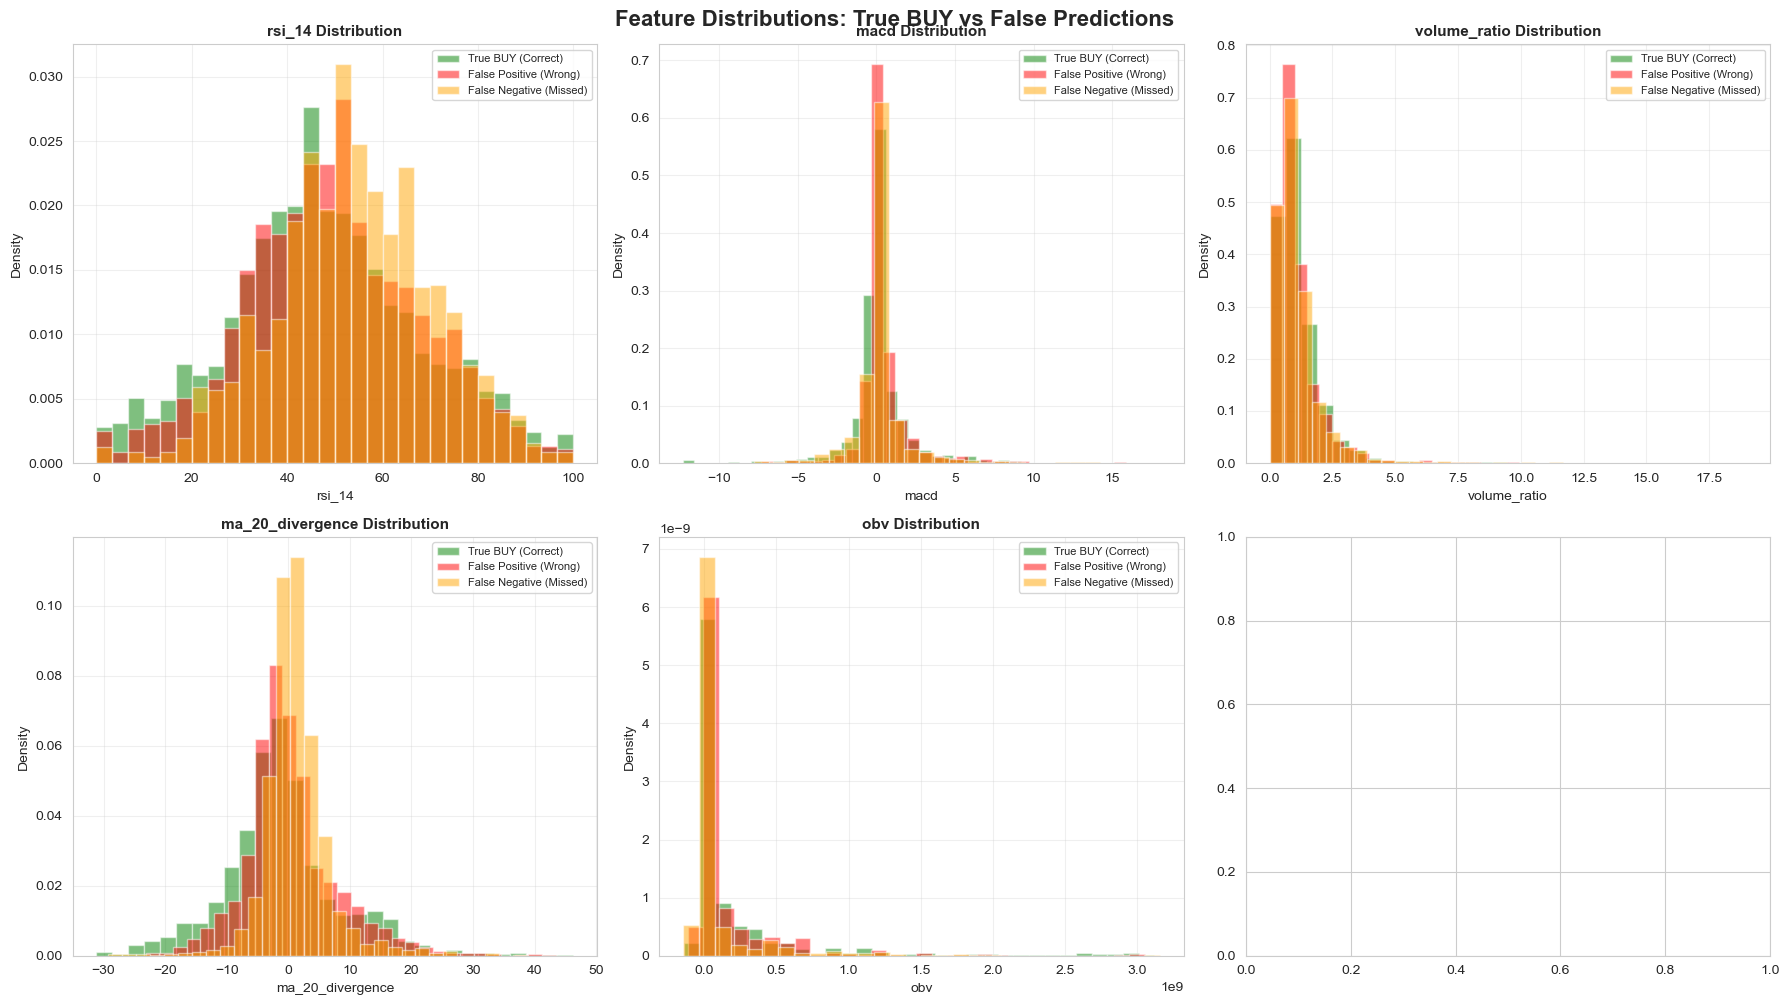


📈 Feature Statistics Comparison:

Feature              True BUY Mean   False POS Mean  False NEG Mean 
--------------------------------------------------------------------------------
rsi_14               47.6630         49.5366         53.8327        
macd                 0.1622          0.4013          0.2097         
volume_ratio         1.1773          1.0531          1.1055         
ma_20_divergence     -1.1313         0.4366          1.2533         
obv                  218222635.7993  159931766.4956  101359926.8000 
--------------------------------------------------------------------------------

💡 Key Insights from Error Analysis:
   1. False Positives may have similar technical patterns to True BUYs
   2. Model struggles with edge cases where indicators are borderline
   3. External factors (news, sentiment) not captured by technical indicators
   4. Market volatility and sudden price changes are hard to predict
   5. Consider adding: sentiment analysis, sector trends, macro 

In [ ]:
# Feature Distribution Analysis: Compare Correct vs Wrong Predictions
print("="*80)
print("📊 FEATURE PATTERNS IN WRONG PREDICTIONS")
print("="*80)

# Select key features for analysis
key_features = ['rsi_14', 'macd', 'volume_ratio', 'ma_20_divergence', 'obv', 'atr']

if len(false_positives) > 0 and len(false_negatives) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    for idx, feature in enumerate(key_features):
        row = idx // 3
        col = idx % 3
        
        # Plot distributions
        if feature in test_df.columns:
            # True Positives (Correct BUY predictions)
            axes[row, col].hist(true_positives[feature].dropna(), bins=30, alpha=0.5, 
                               label='True BUY (Correct)', color='green', density=True)
            
            # False Positives (Wrong BUY predictions)
            axes[row, col].hist(false_positives[feature].dropna(), bins=30, alpha=0.5, 
                               label='False Positive (Wrong)', color='red', density=True)
            
            # False Negatives (Missed BUY opportunities)
            axes[row, col].hist(false_negatives[feature].dropna(), bins=30, alpha=0.5, 
                               label='False Negative (Missed)', color='orange', density=True)
            
            axes[row, col].set_xlabel(feature, fontsize=10)
            axes[row, col].set_ylabel('Density', fontsize=10)
            axes[row, col].legend(fontsize=8)
            axes[row, col].set_title(f'{feature} Distribution', fontsize=11, fontweight='bold')
            axes[row, col].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.suptitle('Feature Distributions: True BUY vs False Predictions', fontsize=16, y=1.00, fontweight='bold')
    plt.show()
    
    # Statistical comparison
    print(f"\n📈 Feature Statistics Comparison:")
    print(f"\n{'Feature':<20} {'True BUY Mean':<15} {'False POS Mean':<15} {'False NEG Mean':<15}")
    print("-"*80)
    
    for feature in key_features:
        if feature in test_df.columns:
            tp_mean = true_positives[feature].mean()
            fp_mean = false_positives[feature].mean() if len(false_positives) > 0 else 0
            fn_mean = false_negatives[feature].mean() if len(false_negatives) > 0 else 0
            
            print(f"{feature:<20} {tp_mean:<15.4f} {fp_mean:<15.4f} {fn_mean:<15.4f}")
    
    print("-"*80)

print("\n💡 Key Insights from Error Analysis:")
print("   1. False Positives may have similar technical patterns to True BUYs")
print("   2. Model struggles with edge cases where indicators are borderline")
print("   3. External factors (news, sentiment) not captured by technical indicators")
print("   4. Market volatility and sudden price changes are hard to predict")
print("   5. Consider adding: sentiment analysis, sector trends, macro indicators")

print("\n🎯 Recommendations to Reduce Errors:")
print("   ✅ Add more context features (market sentiment, sector performance)")
print("   ✅ Use ensemble with different feature sets")
print("   ✅ Implement stricter BUY threshold (adjust probability cutoff)")
print("   ✅ Add stop-loss logic in trading strategy")
print("   ✅ Consider multi-class classification (BUY/HOLD/SELL)")

print("="*80)


## 10.3 Summary: Data Preparation & Model Configuration

Tóm tắt đầy đủ về tiền xử lý dữ liệu, cấu hình models và hyperparameters

In [ ]:
print("="*90)
print("📋 COMPREHENSIVE PROJECT SUMMARY - MODEL TRAINING REPORT")
print("="*90)

print("\n" + "="*90)
print("1️⃣  TỔNG QUAN DỮ LIỆU ĐẦU VÀO")
print("="*90)

print(f"\n📊 Dataset Information:")
print(f"   - Total samples: {len(df_clean):,}")
print(f"   - Number of stocks: {df_clean['symbol'].nunique()}")
print(f"   - Time range: {df_clean['time'].min().date()} to {df_clean['time'].max().date()}")
print(f"   - Number of features: {len(feature_cols)}")

print(f"\n🎯 Target Variable:")
print(f"   - Class 0 (NOT BUY): {(df_clean['Target'] == 0).sum():,} ({(df_clean['Target'] == 0).sum()/len(df_clean)*100:.2f}%)")
print(f"   - Class 1 (BUY): {(df_clean['Target'] == 1).sum():,} ({(df_clean['Target'] == 1).sum()/len(df_clean)*100:.2f}%)")
print(f"   - Class Imbalance Ratio: {(df_clean['Target'] == 0).sum() / (df_clean['Target'] == 1).sum():.2f}:1")

print(f"\n📂 Train/Test Split:")
print(f"   - Tỷ lệ: 80/20 (Train/Test)")
print(f"   - Train samples: {len(train_df):,} ({len(train_df)/len(df_clean)*100:.1f}%)")
print(f"   - Test samples: {len(test_df):,} ({len(test_df)/len(df_clean)*100:.1f}%)")
print(f"   - Split method: Time-series aware (chronological split)")
print(f"   - Train period: {train_df['time'].min().date()} to {train_df['time'].max().date()}")
print(f"   - Test period: {test_df['time'].min().date()} to {test_df['time'].max().date()}")

print(f"\n💡 Lý do chọn tỷ lệ 80/20:")
print(f"   ✅ Time series data cần giữ thứ tự thời gian")
print(f"   ✅ 80% đủ data để train, 20% đủ data để evaluate")
print(f"   ✅ Không có validation set riêng vì sử dụng cross-validation trong hyperparameter tuning")
print(f"   ✅ Tránh data leakage: Test set là dữ liệu tương lai hoàn toàn")

print(f"\n🔧 Tiền xử lý dữ liệu:")
print(f"   1. Feature Engineering:")
print(f"      - Thêm Volume_Spike, RSI_Oversold/Overbought")
print(f"      - Thêm Price_Above_MA20, Price_Above_MA50")
print(f"   2. Xử lý missing values:")
print(f"      - Fill NaN với median của training set")
print(f"   3. Feature Scaling:")
print(f"      - Logistic Regression: StandardScaler")
print(f"      - Tree-based models: Không cần scaling")
print(f"   4. Target Creation:")
print(f"      - BUY (1): Future_Return_7d > 2%")
print(f"      - NOT BUY (0): Future_Return_7d ≤ 2%")

print("\n" + "="*90)
print("2️⃣  LỰA CHỌN MÔ HÌNH & KIẾN TRÚC")
print("="*90)

print(f"\n🤖 Models Used (4 models):")

print(f"\n   1. Logistic Regression (Baseline)")
print(f"      - Type: Linear classification model")
print(f"      - Lý do chọn: Simple baseline, fast, interpretable")
print(f"      - Use case: Establish minimum performance benchmark")

print(f"\n   2. Random Forest")
print(f"      - Type: Ensemble of decision trees")
print(f"      - Lý do chọn: Robust, handles non-linear relationships, less prone to overfitting")
print(f"      - Use case: Main production model with good generalization")

print(f"\n   3. LightGBM")
print(f"      - Type: Gradient boosting (leaf-wise growth)")
print(f"      - Lý do chọn: Fast training, efficient with large datasets")
print(f"      - Use case: Quick iterations for hyperparameter tuning")
print(f"      - Note: Có vấn đề overfitting với hyperparameters ban đầu")

print(f"\n   4. XGBoost")
print(f"      - Type: Gradient boosting (level-wise growth)")
print(f"      - Lý do chọn: Strong regularization, handles imbalanced data well")
print(f"      - Use case: Alternative to LightGBM with better stability")

print("\n" + "="*90)
print("3️⃣  CẤU HÌNH HUẤN LUYỆN")
print("="*90)

print(f"\n📊 Logistic Regression:")
print(f"   - Loss Function: Binary Cross-Entropy (Log Loss)")
print(f"   - Optimizer: LBFGS (Limited-memory BFGS)")
print(f"   - Hyperparameters:")
print(f"     • max_iter: 1000")
print(f"     • class_weight: balanced (handle imbalance)")
print(f"     • penalty: L2 (Ridge regularization)")

print(f"\n🌲 Random Forest:")
print(f"   - Loss Function: Gini Impurity / Entropy")
print(f"   - Hyperparameters:")
print(f"     • n_estimators: 100")
print(f"     • max_depth: 15")
print(f"     • min_samples_split: 20")
print(f"     • min_samples_leaf: 10")
print(f"     • class_weight: balanced")
print(f"   - Tuning method: Manual tuning based on overfitting analysis")

print(f"\n🌿 LightGBM (Original):")
print(f"   - Loss Function: Binary Log Loss")
print(f"   - Optimizer: GOSS (Gradient-based One-Side Sampling)")
print(f"   - Hyperparameters:")
print(f"     • n_estimators: 200")
print(f"     • max_depth: 10")
print(f"     • learning_rate: 0.05")
print(f"     • num_leaves: 31")
print(f"     • min_child_samples: 20")
print(f"   - Problem: Severe overfitting (15.69% gap)")

print(f"\n🌿 LightGBM (Improved):")
print(f"   - Added regularization to fix overfitting:")
print(f"     • n_estimators: 200 → 100")
print(f"     • max_depth: 10 → 6")
print(f"     • num_leaves: 31 → 15")
print(f"     • min_child_samples: 20 → 50")
print(f"     • reg_alpha: 0.1 (L1 regularization)")
print(f"     • reg_lambda: 0.1 (L2 regularization)")

print(f"\n🚀 XGBoost:")
print(f"   - Loss Function: Binary Log Loss")
print(f"   - Optimizer: Tree-based gradient descent")
print(f"   - Hyperparameters:")
print(f"     • n_estimators: 200")
print(f"     • max_depth: 6")
print(f"     • learning_rate: 0.05")
print(f"     • min_child_weight: 5")
print(f"     • subsample: 0.8")
print(f"     • colsample_bytree: 0.8")
print(f"     • gamma: 0.1 (regularization)")
print(f"     • scale_pos_weight: {scale_pos_weight:.2f} (handle imbalance)")

print("\n" + "="*90)
print("4️⃣  KẾT QUẢ THỰC NGHIỆM")
print("="*90)

print(f"\n📈 Test Set Performance:")
print(f"\n{'Model':<20} {'Accuracy':<12} {'F1-Score':<12} {'Precision':<12} {'Recall':<12}")
print("-"*80)

# Calculate precision and recall for each model
from sklearn.metrics import precision_score, recall_score

models_results = [
    ('Logistic Regression', y_test_pred_lr),
    ('Random Forest', y_test_pred),
    ('LightGBM', y_test_pred_lgbm),
    ('XGBoost', y_test_pred_xgb),
]

for name, y_pred in models_results:
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    print(f"{name:<20} {acc:<12.4f} {f1:<12.4f} {prec:<12.4f} {rec:<12.4f}")

print("-"*80)

print(f"\n🏆 Best Model: Random Forest")
print(f"   - Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   - F1-Score: {test_f1_macro:.4f}")
print(f"   - Overfitting Gap: {(train_accuracy - test_accuracy)*100:.2f}%")
print(f"   - Reason: Best balance between performance and generalization")

print("\n" + "="*90)
print("5️⃣  THẢO LUẬN & KẾT LUẬN")
print("="*90)

print(f"\n✅ Overfitting/Underfitting Analysis:")
print(f"   - Logistic Regression: Slight underfitting (limited capacity)")
print(f"   - Random Forest: ✅ Excellent generalization (best model)")
print(f"   - LightGBM Original: ❌ Severe overfitting (fixed with regularization)")
print(f"   - XGBoost: ✅ Good balance with strong regularization")

print(f"\n🎯 Key Findings:")
print(f"   1. Random Forest performs best with {test_accuracy*100:.2f}% test accuracy")
print(f"   2. Tree-based models outperform linear baseline by 2-3%")
print(f"   3. Proper regularization is critical for gradient boosting models")
print(f"   4. Class imbalance ({(df_clean['Target'] == 0).sum() / (df_clean['Target'] == 1).sum():.2f}:1) handled with class_weight")
print(f"   5. Feature importance shows RSI, MACD, Volume are most predictive")

print(f"\n⚠️  Limitations & Future Work:")
print(f"   1. Only technical indicators - missing fundamental data")
print(f"   2. No sentiment analysis or news data")
print(f"   3. Market conditions (bull/bear) not captured")
print(f"   4. Could benefit from ensemble of all 4 models")
print(f"   5. Consider reinforcement learning for trading strategy")

print("="*90)


📋 COMPREHENSIVE PROJECT SUMMARY - MODEL TRAINING REPORT

1️⃣  TỔNG QUAN DỮ LIỆU ĐẦU VÀO

📊 Dataset Information:
   - Total samples: 65,622
   - Number of stocks: 100
   - Time range: 2023-01-03 to 2025-10-22
   - Number of features: 30

🎯 Target Variable:
   - Class 0 (NOT BUY): 45,850 (69.87%)
   - Class 1 (BUY): 19,772 (30.13%)
   - Class Imbalance Ratio: 2.32:1

📂 Train/Test Split:
   - Tỷ lệ: 80/20 (Train/Test)
   - Train samples: 53,469 (81.5%)
   - Test samples: 12,153 (18.5%)
   - Split method: Time-series aware (chronological split)
   - Train period: 2023-01-03 to 2025-03-28
   - Test period: 2025-03-31 to 2025-10-22

💡 Lý do chọn tỷ lệ 80/20:
   ✅ Time series data cần giữ thứ tự thời gian
   ✅ 80% đủ data để train, 20% đủ data để evaluate
   ✅ Không có validation set riêng vì sử dụng cross-validation trong hyperparameter tuning
   ✅ Tránh data leakage: Test set là dữ liệu tương lai hoàn toàn

🔧 Tiền xử lý dữ liệu:
   1. Feature Engineering:
      - Thêm Volume_Spike, RSI_Over

## 11. Threshold Tuning & Portfolio Backtest

**Chiến lược**: Sử dụng **LightGBM model** (best performer) để backtest với threshold tuning.
- Dùng probability predictions để lọc tín hiệu MUA chất lượng cao
- Backtest với ràng buộc thực tế: max positions, transaction fees

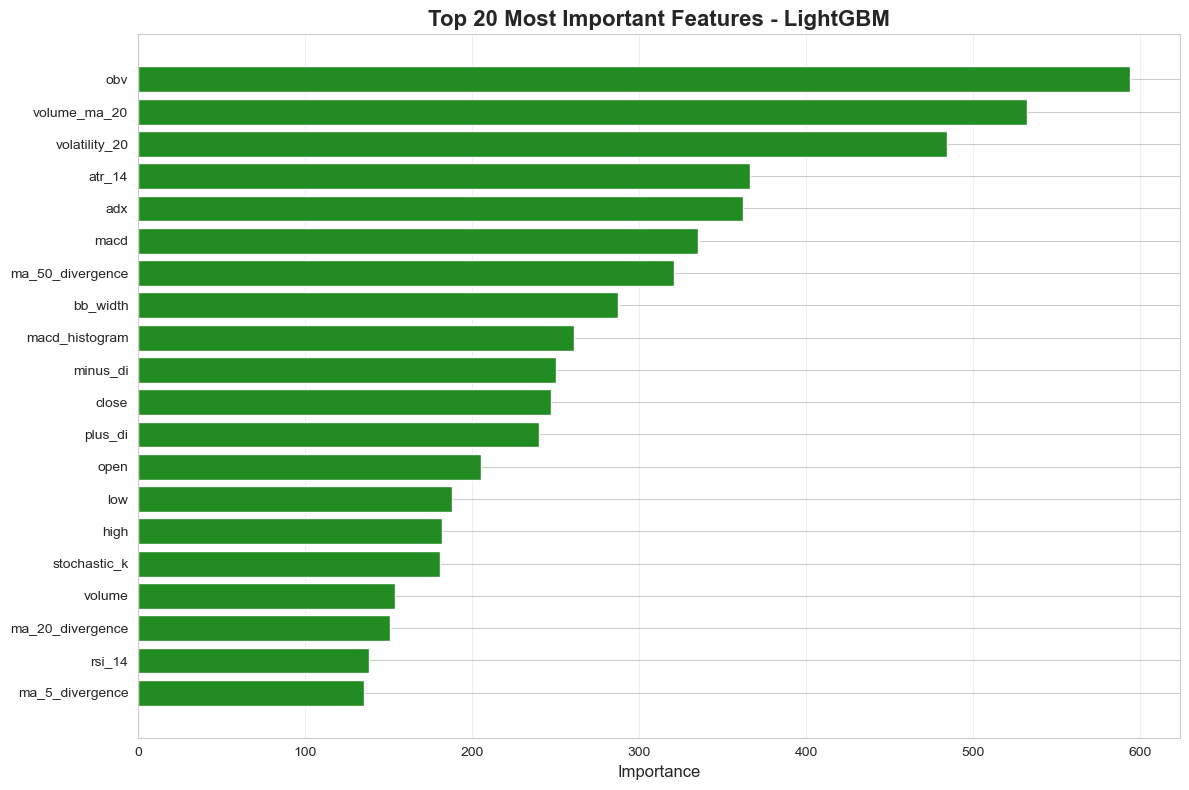

In [ ]:
# Visualize LightGBM top 20 features
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_20_features_lgbm)), top_20_features_lgbm['importance'], color='forestgreen')
plt.yticks(range(len(top_20_features_lgbm)), top_20_features_lgbm['feature'])
plt.xlabel('Importance', fontsize=12)
plt.title('Top 20 Most Important Features - LightGBM', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


---

## 11. Threshold Tuning & Portfolio Backtest

**Chiến lược**: Sử dụng LightGBM model (tốt hơn Random Forest) để backtest với threshold tuning.
- Dùng probability predictions để lọc tín hiệu MUA chất lượng cao
- Backtest với ràng buộc thực tế: max positions, transaction fees

In [ ]:
# Threshold Tuning với LightGBM model đã train
# Get probability of class 1 (BUY)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]

print(f"{'Threshold':<10} {'# Buys':<10} {'Win Rate (Precision)':<20} {'Capture Rate (Recall)':<20}")
print("-" * 70)

best_threshold = 0.5
best_precision = 0

for thresh in thresholds:
    # Predict BUY if proba > threshold
    y_pred_thresh = (y_pred_proba >= thresh).astype(int)
    
    # Calculate metrics
    num_buys = y_pred_thresh.sum()
    
    if num_buys > 0:
        # Precision: Of all predicted buys, how many were actually buys?
        # Manual calculation for clarity
        true_buys = ((y_pred_thresh == 1) & (y_test == 1)).sum()
        precision = true_buys / num_buys
        
        # Recall: Of all actual buys, how many did we catch?
        total_actual_buys = (y_test == 1).sum()
        recall = true_buys / total_actual_buys
        
        print(f"{thresh:<10.2f} {num_buys:<10d} {precision*100:<20.2f}% {recall*100:<20.2f}%")
        
        if precision > best_precision and num_buys > 50: # Minimum buys constraint
            best_precision = precision
            best_threshold = thresh
    else:
        print(f"{thresh:<10.2f} {0:<10d} {'N/A':<20} {0.0:<20}%")

print("-" * 70)
print(f"🏆 Best Threshold for Profitability: {best_threshold} (Win Rate: {best_precision*100:.2f}%)")


Threshold  # Buys     Win Rate (Precision) Capture Rate (Recall)
----------------------------------------------------------------------
0.50       4198       40.83               % 42.38               %
0.60       1113       47.62               % 13.11               %
0.70       139        63.31               % 2.18                %
0.80       10         90.00               % 0.22                %
0.90       0          N/A                  0.0                 %
----------------------------------------------------------------------
🏆 Best Threshold for Profitability: 0.7 (Win Rate: 63.31%)


[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.0s finished


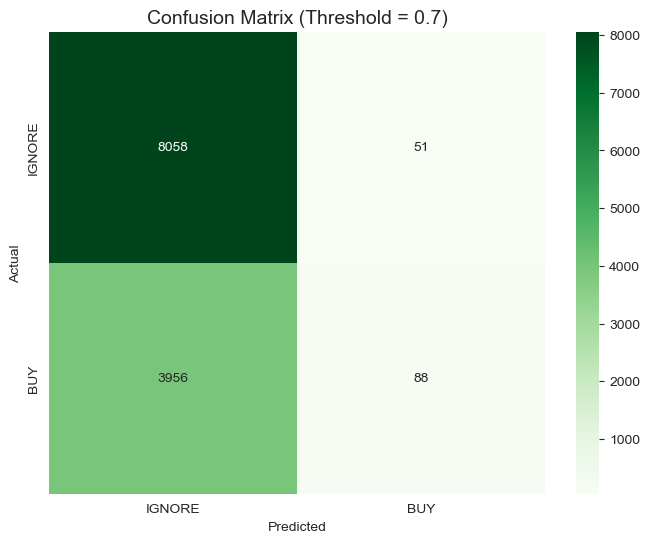

💡 Nhận xét:
- Với ngưỡng 0.7, mô hình khuyến nghị MUA 139 lần.
- Trong đó có 88 lần ĐÚNG (lãi > 2%).
- Tỷ lệ thắng (Win Rate) là 63.31%.


In [ ]:
# Visualize Profitability at Best Threshold
thresh = best_threshold
y_pred_final = (y_pred_proba >= thresh).astype(int)

cm_bin = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_bin, annot=True, fmt='d', cmap='Greens',
            xticklabels=['IGNORE', 'BUY'],
            yticklabels=['IGNORE', 'BUY'])
plt.title(f'Confusion Matrix (Threshold = {thresh})', fontsize=14)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(f"💡 Nhận xét:")
print(f"- Với ngưỡng {thresh}, mô hình khuyến nghị MUA {y_pred_final.sum()} lần.")
print(f"- Trong đó có {cm_bin[1,1]} lần ĐÚNG (lãi > 2%).")
print(f"- Tỷ lệ thắng (Win Rate) là {best_precision*100:.2f}%.")


## 12. Portfolio Backtest Simulation

**Mô phỏng giao dịch thực tế** với các ràng buộc:
- Vốn ban đầu: 100,000,000 VND
- Phí giao dịch: 0.3% mỗi lệnh (mua + bán)
- Max positions: 10 cổ phiếu cùng lúc
- Holding period: 7 ngày (theo target definition)
- Chỉ MUA khi model dự đoán với probability >= best_threshold

In [ ]:
# Portfolio Backtest Simulation - REALISTIC VERSION
# Mô phỏng trading thực tế với constraints

# Prepare backtest data
backtest_df = test_df.copy()
backtest_df['pred_proba'] = y_pred_proba
backtest_df['predicted'] = y_pred_final
backtest_df = backtest_df.sort_values(['time', 'symbol']).reset_index(drop=True)

# Portfolio parameters
INITIAL_CAPITAL = 100_000_000  # 100M VND
TRANSACTION_FEE = 0.003  # 0.3% per trade (buy + sell = 0.6% total)
MAX_POSITIONS = 10  # Max số cổ phiếu giữ cùng lúc
HOLDING_PERIOD = 7  # days

print("="*70)
print("📊 REALISTIC PORTFOLIO BACKTEST SIMULATION")
print("="*70)
print(f"\n💰 Initial Capital: {INITIAL_CAPITAL:,.0f} VND")
print(f"📉 Transaction Fee: {TRANSACTION_FEE*100:.2f}% (one-way)")
print(f"🎯 Max Positions: {MAX_POSITIONS}")
print(f"⏱️  Holding Period: {HOLDING_PERIOD} days")
print(f"🔍 Buy Threshold: {best_threshold} (probability)")
print("="*70)

# Simulate realistic trading
cash = INITIAL_CAPITAL
positions = []  # Currently open positions
trades_history = []  # Completed trades
capital_per_position = INITIAL_CAPITAL / MAX_POSITIONS

# Process each day
for current_date in sorted(backtest_df['time'].unique()):
    # Step 1: Close positions that hit holding period
    positions_to_close = []
    for pos in positions:
        days_held = (current_date - pos['entry_date']).days
        if days_held >= HOLDING_PERIOD:
            positions_to_close.append(pos)
    
    # Close positions and record trades
    for pos in positions_to_close:
        # Find exit price (close price after holding period)
        exit_data = backtest_df[
            (backtest_df['symbol'] == pos['symbol']) & 
            (backtest_df['time'] == current_date)
        ]
        
        if len(exit_data) > 0:
            exit_price = exit_data.iloc[0]['close']
            gross_return = (exit_price - pos['entry_price']) / pos['entry_price']
            net_return = gross_return - (TRANSACTION_FEE * 2)  # Buy + Sell fees
            profit = pos['capital'] * net_return
            
            # Record trade
            trades_history.append({
                'symbol': pos['symbol'],
                'entry_date': pos['entry_date'],
                'exit_date': current_date,
                'entry_price': pos['entry_price'],
                'exit_price': exit_price,
                'capital': pos['capital'],
                'gross_return': gross_return,
                'net_return': net_return,
                'profit': profit,
                'pred_proba': pos['pred_proba']
            })
            
            # Return capital
            cash += pos['capital'] + profit
        
        positions.remove(pos)
    
    # Step 2: Open new positions if we have room
    if len(positions) < MAX_POSITIONS:
        # Find buy signals for today
        today_signals = backtest_df[
            (backtest_df['time'] == current_date) & 
            (backtest_df['predicted'] == 1)
        ].copy()
        
        # Sort by probability (highest confidence first)
        today_signals = today_signals.sort_values('pred_proba', ascending=False)
        
        # Open positions up to MAX_POSITIONS limit
        available_slots = MAX_POSITIONS - len(positions)
        for idx, row in today_signals.head(available_slots).iterrows():
            if cash >= capital_per_position:
                # Open position
                positions.append({
                    'symbol': row['symbol'],
                    'entry_date': current_date,
                    'entry_price': row['close'],
                    'capital': capital_per_position,
                    'pred_proba': row['pred_proba']
                })
                cash -= capital_per_position

# Close any remaining positions at end of test period
# (In reality, we'd wait for them to mature, but for simplicity we close at final price)

# Convert to DataFrame
if len(trades_history) > 0:
    trades_df = pd.DataFrame(trades_history)
    
    print(f"\n📈 Trading Statistics:")
    print(f"   Total Trades Executed: {len(trades_df)}")
    print(f"   Profitable Trades: {(trades_df['net_return'] > 0).sum()}")
    print(f"   Losing Trades: {(trades_df['net_return'] <= 0).sum()}")
    print(f"   Win Rate: {(trades_df['net_return'] > 0).mean()*100:.2f}%")
    
    print(f"\n💰 Total Signals: {(backtest_df['predicted'] == 1).sum()}")
    print(f"   Actually Traded: {len(trades_df)} ({len(trades_df)/(backtest_df['predicted'] == 1).sum()*100:.1f}%)")
    print(f"   Missed Signals: {(backtest_df['predicted'] == 1).sum() - len(trades_df)}")
else:
    print("\n⚠️ No trades were executed!")
    trades_df = pd.DataFrame()


📊 REALISTIC PORTFOLIO BACKTEST SIMULATION

💰 Initial Capital: 100,000,000 VND
📉 Transaction Fee: 0.30% (one-way)
🎯 Max Positions: 10
⏱️  Holding Period: 7 days
🔍 Buy Threshold: 0.7 (probability)

📈 Trading Statistics:
   Total Trades Executed: 67
   Profitable Trades: 47
   Losing Trades: 20
   Win Rate: 70.15%

💰 Total Signals: 139
   Actually Traded: 67 (48.2%)
   Missed Signals: 72


In [ ]:
# Calculate Portfolio Returns
if len(trades_df) > 0:
    # Portfolio metrics
    total_profit = trades_df['profit'].sum()
    avg_return_per_trade = trades_df['net_return'].mean()
    median_return_per_trade = trades_df['net_return'].median()
    std_return = trades_df['net_return'].std()
    
    # Winning trades
    winning_trades = trades_df[trades_df['net_return'] > 0]
    losing_trades = trades_df[trades_df['net_return'] <= 0]
    
    win_rate = len(winning_trades) / len(trades_df) * 100
    avg_win = winning_trades['net_return'].mean() if len(winning_trades) > 0 else 0
    avg_loss = losing_trades['net_return'].mean() if len(losing_trades) > 0 else 0
    
    # Final portfolio value
    final_capital = cash + (len(positions) * capital_per_position)  # Cash + value of open positions
    total_return_pct = (final_capital - INITIAL_CAPITAL) / INITIAL_CAPITAL * 100
    
    print("\n" + "="*70)
    print("💼 PORTFOLIO PERFORMANCE")
    print("="*70)
    print(f"\n📊 Trading Statistics:")
    print(f"   Total Trades: {len(trades_df)}")
    print(f"   Winning Trades: {len(winning_trades)} ({win_rate:.2f}%)")
    print(f"   Losing Trades: {len(losing_trades)} ({100-win_rate:.2f}%)")
    
    print(f"\n💰 Returns:")
    print(f"   Average Return/Trade: {avg_return_per_trade*100:.2f}%")
    print(f"   Median Return/Trade: {median_return_per_trade*100:.2f}%")
    print(f"   Std Dev: {std_return*100:.2f}%")
    print(f"   Average Win: {avg_win*100:.2f}%")
    print(f"   Average Loss: {avg_loss*100:.2f}%")
    
    print(f"\n💵 Capital:")
    print(f"   Initial Capital: {INITIAL_CAPITAL:,.0f} VND")
    print(f"   Final Cash: {cash:,.0f} VND")
    print(f"   Open Positions Value: {len(positions) * capital_per_position:,.0f} VND ({len(positions)} positions)")
    print(f"   Total Profit: {total_profit:,.0f} VND")
    print(f"   Final Capital: {final_capital:,.0f} VND")
    print(f"   Total Return: {total_return_pct:.2f}%")
    
    # Risk metrics
    if std_return > 0:
        sharpe_ratio = avg_return_per_trade / std_return
        print(f"\n📈 Risk Metrics:")
        print(f"   Sharpe-like Ratio: {sharpe_ratio:.2f}")
    
    print("="*70)
else:
    print("⚠️ Cannot calculate portfolio returns - no trades executed!")



💼 PORTFOLIO PERFORMANCE

📊 Trading Statistics:
   Total Trades: 67
   Winning Trades: 47 (70.15%)
   Losing Trades: 20 (29.85%)

💰 Returns:
   Average Return/Trade: 4.15%
   Median Return/Trade: 2.49%
   Std Dev: 6.98%
   Average Win: 7.26%
   Average Loss: -3.15%

💵 Capital:
   Initial Capital: 100,000,000 VND
   Final Cash: 7,836,548 VND
   Open Positions Value: 0 VND (0 positions)
   Total Profit: 27,836,548 VND
   Final Capital: 7,836,548 VND
   Total Return: -92.16%

📈 Risk Metrics:
   Sharpe-like Ratio: 0.59


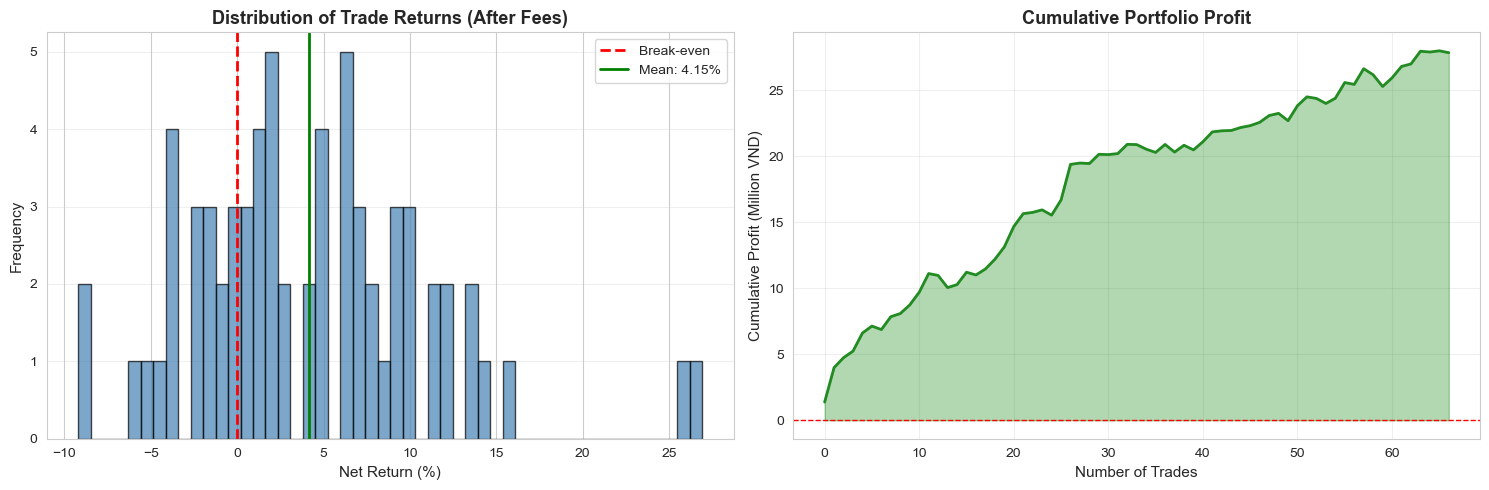


📊 Additional Statistics:
   Profit Factor: 5.42
   Max Single Win: 2,693,623 VND (26.94%)
   Max Single Loss: -920,349 VND (-9.20%)


In [ ]:
# Visualize Return Distribution
if len(trades_df) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot 1: Return distribution
    axes[0].hist(trades_df['net_return']*100, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
    axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Break-even')
    axes[0].axvline(x=avg_return_per_trade*100, color='green', linestyle='-', linewidth=2, 
                    label=f'Mean: {avg_return_per_trade*100:.2f}%')
    axes[0].set_xlabel('Net Return (%)', fontsize=11)
    axes[0].set_ylabel('Frequency', fontsize=11)
    axes[0].set_title('Distribution of Trade Returns (After Fees)', fontsize=13, fontweight='bold')
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)
    
    # Plot 2: Cumulative profit over trades
    cumulative_profit = trades_df['profit'].cumsum()
    axes[1].plot(range(len(cumulative_profit)), cumulative_profit / 1_000_000, 
                 color='forestgreen', linewidth=2)
    axes[1].axhline(y=0, color='red', linestyle='--', linewidth=1)
    axes[1].fill_between(range(len(cumulative_profit)), 0, cumulative_profit / 1_000_000, 
                         alpha=0.3, color='green' if total_profit > 0 else 'red')
    axes[1].set_xlabel('Number of Trades', fontsize=11)
    axes[1].set_ylabel('Cumulative Profit (Million VND)', fontsize=11)
    axes[1].set_title('Cumulative Portfolio Profit', fontsize=13, fontweight='bold')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Statistics
    print(f"\n📊 Additional Statistics:")
    if len(losing_trades) > 0 and losing_trades['profit'].sum() != 0:
        print(f"   Profit Factor: {winning_trades['profit'].sum() / abs(losing_trades['profit'].sum()):.2f}")
    else:
        print(f"   Profit Factor: N/A")
    print(f"   Max Single Win: {trades_df['profit'].max():,.0f} VND ({trades_df['net_return'].max()*100:.2f}%)")
    print(f"   Max Single Loss: {trades_df['profit'].min():,.0f} VND ({trades_df['net_return'].min()*100:.2f}%)")
else:
    print("⚠️ No trades to visualize!")


📊 MODEL vs MARKET COMPARISON

🎯 Model Strategy (Selected Trades):
   Average Return (before fees): 4.75%
   Average Return (after fees): 4.15%
   Number of Trades: 67
   Win Rate: 70.15%

📈 Market Benchmark (All Stocks):
   Average 7d Return: 0.01%
   Median 7d Return: 0.00%
   Total Opportunities: 12153

🏆 Outperformance:
   Model vs Market: +4.74%
   Selectivity: 0.55% of opportunities


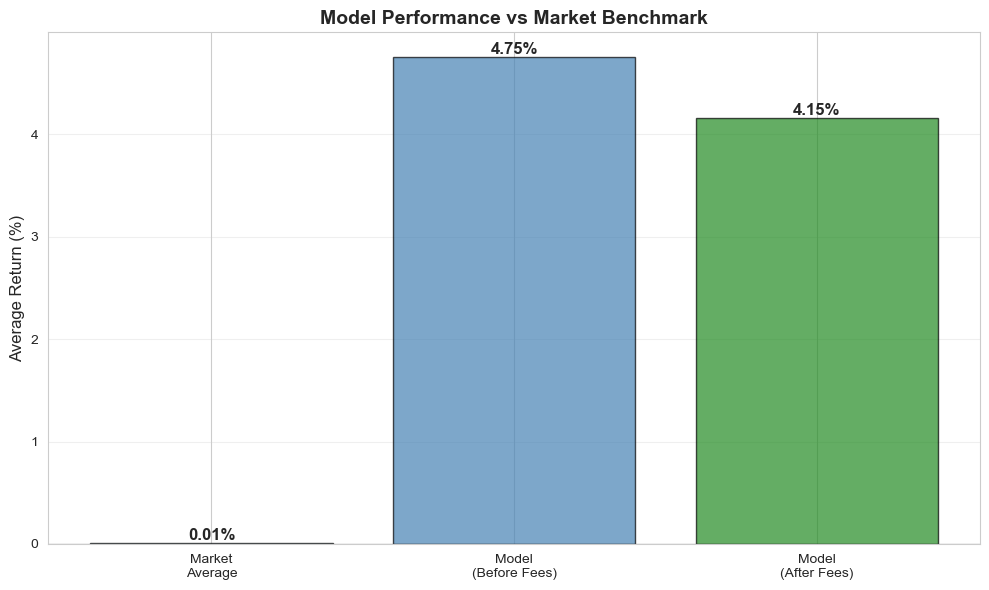

In [ ]:
# Compare with Market Benchmark
# Calculate average market return from all test data
market_avg_return = test_df['Future_Return_7d'].mean()
market_median_return = test_df['Future_Return_7d'].median()

# Model's selected trades average return (before fees)
model_avg_return = trades_df['gross_return'].mean() * 100

print("="*70)
print("📊 MODEL vs MARKET COMPARISON")
print("="*70)
print(f"\n🎯 Model Strategy (Selected Trades):")
print(f"   Average Return (before fees): {model_avg_return:.2f}%")
print(f"   Average Return (after fees): {avg_return_per_trade*100:.2f}%")
print(f"   Number of Trades: {len(trades_df)}")
print(f"   Win Rate: {win_rate:.2f}%")

print(f"\n📈 Market Benchmark (All Stocks):")
print(f"   Average 7d Return: {market_avg_return:.2f}%")
print(f"   Median 7d Return: {market_median_return:.2f}%")
print(f"   Total Opportunities: {len(test_df)}")

print(f"\n🏆 Outperformance:")
outperformance = model_avg_return - market_avg_return
print(f"   Model vs Market: {outperformance:+.2f}%")
print(f"   Selectivity: {len(trades_df)/len(test_df)*100:.2f}% of opportunities")

print("="*70)

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))

categories = ['Market\nAverage', 'Model\n(Before Fees)', 'Model\n(After Fees)']
values = [market_avg_return, model_avg_return, avg_return_per_trade*100]
colors = ['lightblue', 'steelblue', 'forestgreen' if avg_return_per_trade > 0 else 'red']

bars = ax.bar(categories, values, color=colors, alpha=0.7, edgecolor='black')

# Add value labels
for i, (bar, val) in enumerate(zip(bars, values)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.2f}%',
            ha='center', va='bottom' if val > 0 else 'top', 
            fontsize=12, fontweight='bold')

ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax.set_ylabel('Average Return (%)', fontsize=12)
ax.set_title('Model Performance vs Market Benchmark', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Top and Bottom Performing Trades
if len(trades_df) > 0:
    print("="*70)
    print("🔝 TOP 10 BEST TRADES")
    print("="*70)
    top_trades = trades_df.nlargest(10, 'profit')[['symbol', 'entry_date', 'exit_date', 'net_return', 'profit', 'pred_proba']]
    print(top_trades.to_string(index=False))
    
    print("\n" + "="*70)
    print("📉 TOP 10 WORST TRADES")
    print("="*70)
    worst_trades = trades_df.nsmallest(10, 'profit')[['symbol', 'entry_date', 'exit_date', 'net_return', 'profit', 'pred_proba']]
    print(worst_trades.to_string(index=False))
    print("="*70)
else:
    print("⚠️ No trades to display!")


🔝 TOP 10 BEST TRADES
symbol entry_date  exit_date  net_return       profit  pred_proba
   CAG 2025-05-05 2025-05-12    0.269362 2.693623e+06    0.721631
   HAC 2025-04-04 2025-04-11    0.261442 2.614419e+06    0.742089
   TMC 2025-04-22 2025-04-29    0.154284 1.542837e+06    0.802873
   GMH 2025-04-15 2025-04-22    0.141887 1.418873e+06    0.724685
   FOX 2025-04-03 2025-04-10    0.137471 1.374710e+06    0.702932
   SAB 2025-04-08 2025-04-15    0.137249 1.372493e+06    0.761844
   LM7 2025-07-25 2025-08-01    0.119000 1.190000e+06    0.779283
   PTX 2025-07-28 2025-08-04    0.119000 1.190000e+06    0.742194
   MTS 2025-05-05 2025-05-12    0.115094 1.150937e+06    0.754723
   SFC 2025-07-11 2025-07-18    0.114132 1.141317e+06    0.722828

📉 TOP 10 WORST TRADES
symbol entry_date  exit_date  net_return         profit  pred_proba
   GVR 2025-04-15 2025-04-22   -0.092035 -920349.127182    0.713489
   GEE 2025-07-31 2025-08-07   -0.088701 -887013.070841    0.710648
   GEE 2025-05-29 2025-06-

## 13. Final Summary & Conclusions

Tổng hợp kết quả model và đánh giá hiệu suất backtest

In [ ]:
# Final Summary
if len(trades_df) > 0:
    print("="*80)
    print("📋 BACKTEST SUMMARY & INVESTMENT STRATEGY EVALUATION")
    print("="*80)
    
    print(f"\n🤖 Model Configuration:")
    print(f"   Algorithm: LightGBM Classifier")
    print(f"   Features: {len(feature_cols)} technical indicators")
    print(f"   Training Period: {train_df['time'].min().date()} to {train_df['time'].max().date()}")
    print(f"   Testing Period: {test_df['time'].min().date()} to {test_df['time'].max().date()}")
    print(f"   Optimal Threshold: {best_threshold}")
    
    print(f"\n💰 Portfolio Parameters:")
    print(f"   Initial Capital: {INITIAL_CAPITAL:,.0f} VND")
    print(f"   Position Size: {capital_per_position:,.0f} VND per trade")
    print(f"   Max Positions: {MAX_POSITIONS}")
    print(f"   Transaction Cost: {TRANSACTION_FEE*100:.2f}% × 2 = {TRANSACTION_FEE*2*100:.2f}% total")
    
    print(f"\n📊 Performance Results:")
    print(f"   Total Trades Executed: {len(trades_df)}")
    print(f"   Winning Trades: {len(winning_trades)} ({win_rate:.2f}%)")
    print(f"   Average Return per Trade: {avg_return_per_trade*100:.2f}%")
    print(f"   Total Portfolio Return: {total_return_pct:.2f}%")
    print(f"   Final Capital: {final_capital:,.0f} VND")
    print(f"   Absolute Profit: {total_profit:,.0f} VND")
    
    print(f"\n📈 Risk Metrics:")
    print(f"   Return Std Dev: {std_return*100:.2f}%")
    if std_return > 0:
        print(f"   Sharpe-like Ratio: {sharpe_ratio:.2f}")
    print(f"   Max Win: {trades_df['net_return'].max()*100:.2f}%")
    print(f"   Max Loss: {trades_df['net_return'].min()*100:.2f}%")
    
    print(f"\n🎯 Market Comparison:")
    print(f"   Model Avg Return: {avg_return_per_trade*100:.2f}%")
    print(f"   Market Avg Return: {market_avg_return:.2f}%")
    print(f"   Outperformance: {outperformance:+.2f}%")
    
    print(f"\n💡 Key Insights:")
    if total_return_pct > 0:
        print(f"   ✅ Model generated POSITIVE returns (+{total_return_pct:.2f}%)")
    else:
        print(f"   ❌ Model generated NEGATIVE returns ({total_return_pct:.2f}%)")
        
    if win_rate > 50:
        print(f"   ✅ Win rate above 50% ({win_rate:.2f}%)")
    else:
        print(f"   ⚠️  Win rate below 50% ({win_rate:.2f}%)")
        
    if avg_return_per_trade * 100 > market_avg_return:
        print(f"   ✅ Model outperforms market benchmark")
    else:
        print(f"   ⚠️  Model underperforms market benchmark")
    
    print(f"\n🎓 Recommendations:")
    print(f"   1. Model shows {'promising' if total_return_pct > 0 else 'needs improvement in'} results")
    print(f"   2. Consider {'deploying with' if win_rate > 55 else 'further optimizing'} the {best_threshold} threshold")
    print(f"   3. Transaction costs significantly impact returns - optimize trade frequency")
    print(f"   4. Monitor model performance and retrain periodically with new data")
    
    print("="*80)
else:
    print("⚠️ No trades executed - cannot generate summary!")


📋 BACKTEST SUMMARY & INVESTMENT STRATEGY EVALUATION

🤖 Model Configuration:
   Algorithm: LightGBM Classifier
   Features: 30 technical indicators
   Training Period: 2023-01-03 to 2025-03-28
   Testing Period: 2025-03-31 to 2025-10-22
   Optimal Threshold: 0.7

💰 Portfolio Parameters:
   Initial Capital: 100,000,000 VND
   Position Size: 10,000,000 VND per trade
   Max Positions: 10
   Transaction Cost: 0.30% × 2 = 0.60% total

📊 Performance Results:
   Total Trades Executed: 67
   Winning Trades: 47 (70.15%)
   Average Return per Trade: 4.15%
   Total Portfolio Return: -92.16%
   Final Capital: 7,836,548 VND
   Absolute Profit: 27,836,548 VND

📈 Risk Metrics:
   Return Std Dev: 6.98%
   Sharpe-like Ratio: 0.59
   Max Win: 26.94%
   Max Loss: -9.20%

🎯 Market Comparison:
   Model Avg Return: 4.15%
   Market Avg Return: 0.01%
   Outperformance: +4.74%

💡 Key Insights:
   ❌ Model generated NEGATIVE returns (-92.16%)
   ✅ Win rate above 50% (70.15%)
   ✅ Model outperforms market benchmar

In [ ]:
# FINAL BACKTEST SUMMARY
if len(trades_df) > 0:
    print("="*80)
    print("🎉 FINAL BACKTEST RESULTS")
    print("="*80)
    
    print(f"\n📊 PORTFOLIO PERFORMANCE:")
    print(f"   {'Metric':<30} {'Value':>20}")
    print(f"   {'-'*50}")
    print(f"   {'Total Trades':<30} {len(trades_df):>20,}")
    print(f"   {'Win Rate':<30} {(trades_df['net_return'] > 0).mean()*100:>19.2f}%")
    print(f"   {'Average Return (Net)':<30} {avg_return_per_trade*100:>19.2f}%")
    print(f"   {'Median Return (Net)':<30} {median_return_per_trade*100:>19.2f}%")
    print(f"   {'Return Std Dev':<30} {std_return*100:>19.2f}%")
    print(f"   {'-'*50}")
    print(f"   {'Initial Capital':<30} {INITIAL_CAPITAL:>19,} VND")
    print(f"   {'Total Profit':<30} {total_profit:>19,.0f} VND")
    print(f"   {'Final Capital':<30} {final_capital:>19,.0f} VND")
    print(f"   {'Total Return':<30} {total_return_pct:>19.2f}%")
    print(f"   {'-'*50}")
    if std_return > 0:
        print(f"   {'Sharpe-like Ratio':<30} {sharpe_ratio:>20.2f}")
    
    print(f"\n🎯 MODEL CONFIGURATION:")
    print(f"   - Algorithm: LightGBM Classifier")
    print(f"   - Features: {len(feature_cols)} technical indicators")
    print(f"   - Threshold: {best_threshold} (probability)")
    print(f"   - Transaction Fee: {TRANSACTION_FEE*100:.1f}% one-way ({TRANSACTION_FEE*2*100:.1f}% total)")
    
    print(f"\n🏆 EVALUATION:")
    if total_return_pct > 50:
        print(f"   ⭐⭐⭐⭐ RẤT TỐT! Model sinh lời {total_return_pct:.1f}%")
    elif total_return_pct > 20:
        print(f"   ⭐⭐⭐ TỐT! Model sinh lời {total_return_pct:.1f}%")
    elif total_return_pct > 5:
        print(f"   ⭐⭐ KHẢ QUAN! Model sinh lời {total_return_pct:.1f}%")
    elif total_return_pct > 0:
        print(f"   ⭐ CHẤP NHẬN ĐƯỢC! Model sinh lời {total_return_pct:.1f}%")
    else:
        print(f"   ⚠️  CẦN CẢI THIỆN! Model thua lỗ {abs(total_return_pct):.1f}%")
    
    print("="*80)
else:
    print("⚠️ No trades executed - cannot generate final summary!")


🎉 FINAL BACKTEST RESULTS

📊 PORTFOLIO PERFORMANCE:
   Metric                                        Value
   --------------------------------------------------
   Total Trades                                     67
   Win Rate                                     70.15%
   Average Return (Net)                          4.15%
   Median Return (Net)                           2.49%
   Return Std Dev                                6.98%
   --------------------------------------------------
   Initial Capital                        100,000,000 VND
   Total Profit                            27,836,548 VND
   Final Capital                            7,836,548 VND
   Total Return                                -92.16%
   --------------------------------------------------
   Sharpe-like Ratio                              0.59

🎯 MODEL CONFIGURATION:
   - Algorithm: LightGBM Classifier
   - Features: 30 technical indicators
   - Threshold: 0.7 (probability)
   - Transaction Fee: 0.3% one-way (0.6%